# CASE STUDY : LEAD SCORING                                                    

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

 

The company markets its courses on several websites, search engines, and even social media sometimes. Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted into successful sales, while most of the leads do not. The typical lead to successful sale conversion rate at X education is around 30%.

 

Now, although X Education gets a lot of leads, its lead-to-sale conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted into successful sales. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate would go up as the sales team would now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel.

As you can see, there are a lot of leads generated in the initial stage (the initial pool of leads), but only a few of them come out as paying customers from the bottom (converted leads). In the middle stage (lead nurturing), you need to nurture the potential leads well (i.e., educate the leads about the product, constantly communicate, etc.) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e., the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark estimate of the target lead conversion rate as being around 80%.

# Step 1 : Reading and Understanding Data

In [358]:
## Impoting Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
## Loading the Data Set
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [360]:
## Getting Info of Data
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [361]:
## Describing the Numerical Statistics
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Step 2: Data Cleaning and Handling Outliers

In [362]:
## Checking the Null Values in all Columns
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [363]:
## Checking the Null Values percentage in all Columns
round(100 * (lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [364]:
## Getting the columns 
columns = lead_df.columns
columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### ~Lets do One action the columns or features which has more than 30% null value which we had no use of them

In [365]:
## Dropping the columns having more than 30% null values
for col in lead_df[columns]:
    if lead_df[col].isnull().sum() > 3000 :
        lead_df.drop(col,axis=1,inplace=True)

In [366]:
lead_df.shape

(9240, 31)

##### ~ Lets we have the columns like 'Do Not Call' with having the Data is skewed to one side, we don't have any use of them for prediction 

In [367]:
## Droping the columns which have Data skewed to one type
lead_df.drop(['Do Not Call','A free copy of Mastering The Interview','I agree to pay the amount through cheque','Get updates on DM Content',
              'Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations',
              'Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine',
              'Search','Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [368]:
lead_df.shape

(9240, 16)

In [369]:
### Lets check null values percentage in columns
round((lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Lead Profile                                     0.29
City                                             0.15
Last Notable Activity                            0.00
dtype: float64

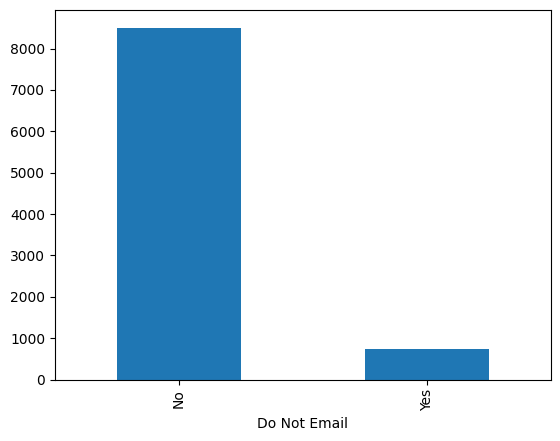

In [370]:
## Lets us see the column What matters most to you in choosing a course
lead_df['Do Not Email'].value_counts().plot.bar()
plt.show()


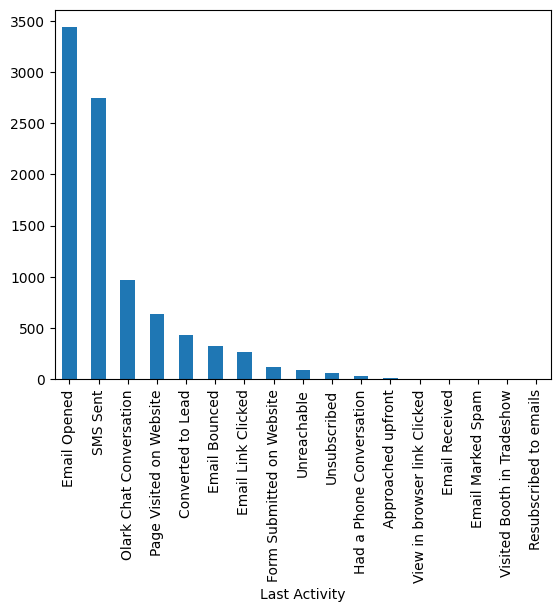

In [371]:
## Lets us see the column What matters most to you in choosing a course
lead_df['Last Activity'].value_counts().plot.bar()
plt.show()


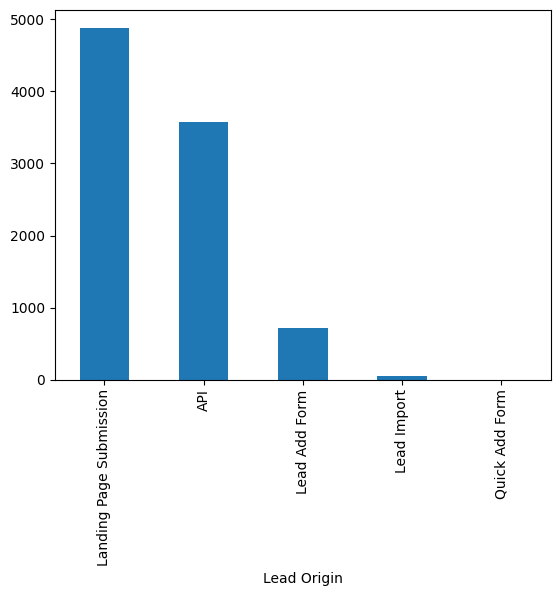

In [372]:
## Lets us see the column What matters most to you in choosing a course
lead_df['Lead Origin'].value_counts().plot.bar()
plt.show()


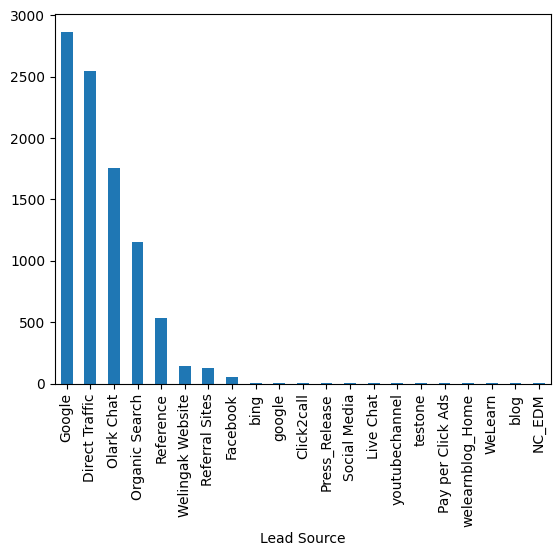

In [373]:
## Lets us see the column What matters most to you in choosing a course
lead_df['Lead Source'].value_counts().plot.bar()
plt.show()


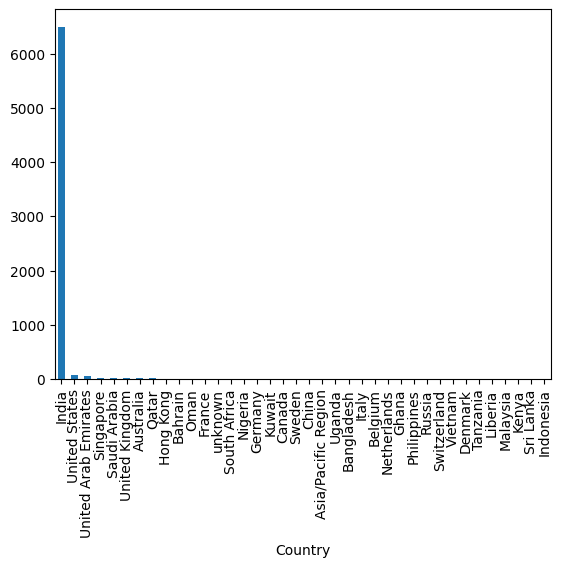

In [374]:
## Lets us the see the column country
lead_df['Country'].value_counts().plot.bar()
plt.show()


##### we have seen that country data had skewed to one type 'India' so its better to drop country column

In [375]:
 ## we dont need country feature as it has no imporatnce
lead_df.drop('Country',axis=1,inplace=True)

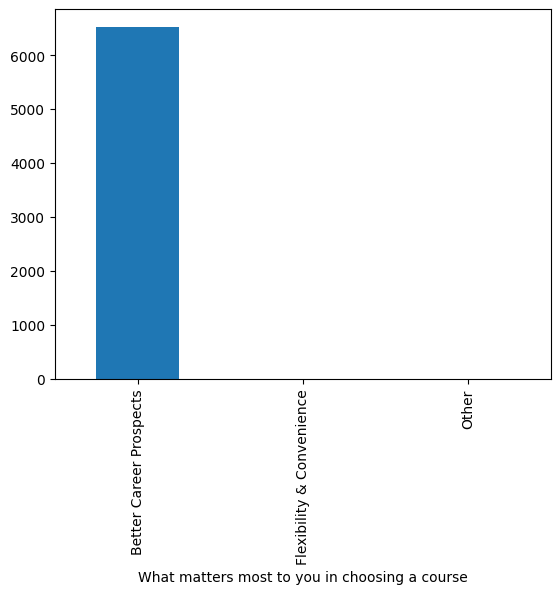

In [376]:
## Lets us see the column What matters most to you in choosing a course
lead_df['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()


##### we have seen that 'What matters most to you in choosing a course' data had skewed to one type 'Better Carrier Prospects' so its better to drop country column

In [377]:
lead_df.drop('What matters most to you in choosing a course',inplace=True,axis=1)

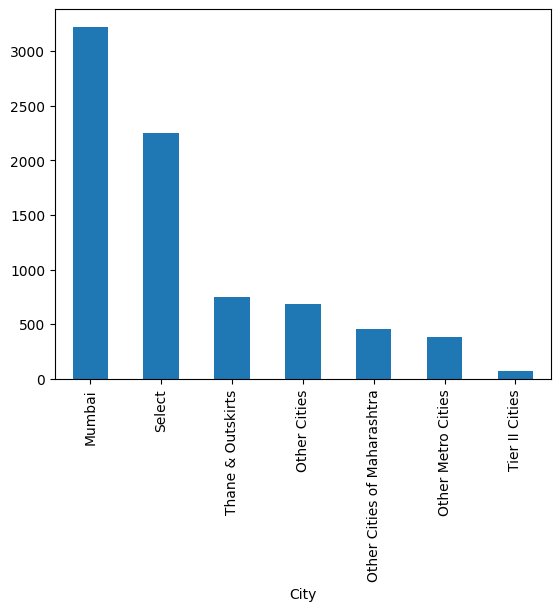

In [378]:
## Lets us the column country
lead_df['City'].value_counts().plot.bar()
plt.show()


In [379]:
## we dont need 'city' demographical feature as it doesnt need for conversion rate
lead_df.drop('City',axis=1,inplace=True)

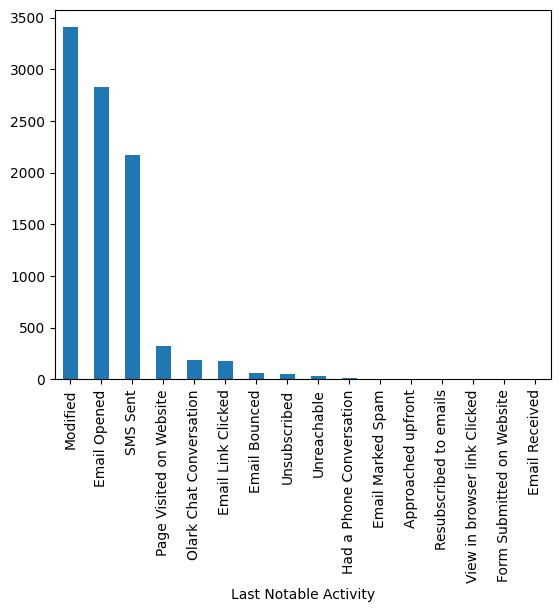

In [380]:
## Lets us the column country
lead_df['Last Notable Activity'].value_counts().plot.bar()
plt.show()


In [381]:
## we dont need these feature as it doesnt need for conversion
lead_df.drop('Last Notable Activity',axis=1,inplace=True)

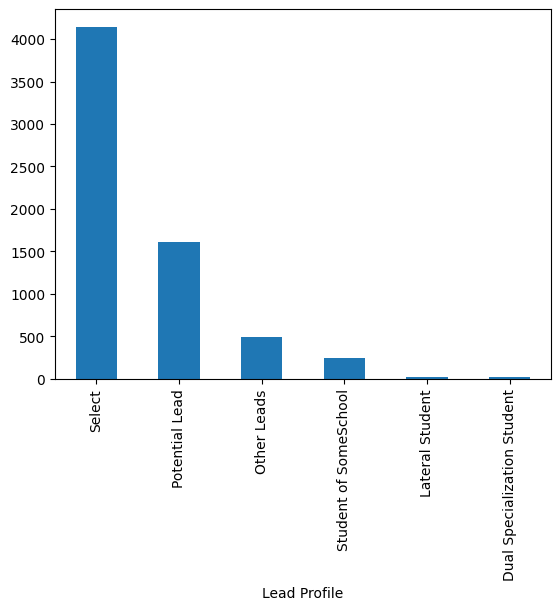

In [382]:
## Lets us the column country
lead_df['Lead Profile'].value_counts().plot.bar()
plt.show()

In [383]:
## we dont need these feature as it doesnt need for conversion
lead_df.drop('Lead Profile',axis=1,inplace=True)

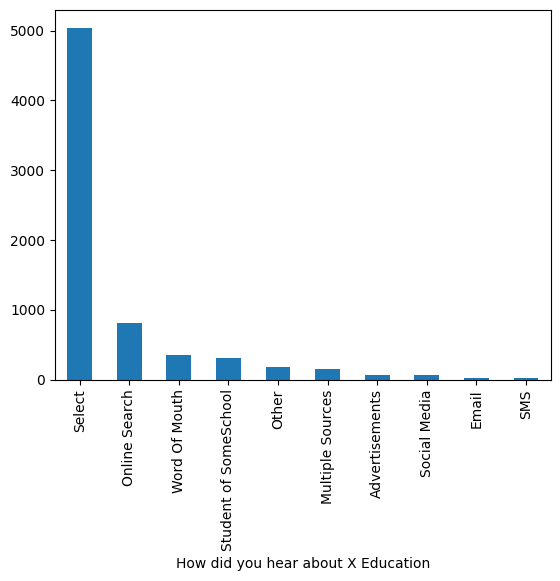

In [384]:
## Lets us the column country
lead_df['How did you hear about X Education'].value_counts().plot.bar()
plt.show()

In [385]:
## we dont need these feature as it doesnt need for conversion
lead_df.drop('How did you hear about X Education',inplace=True,axis=1)

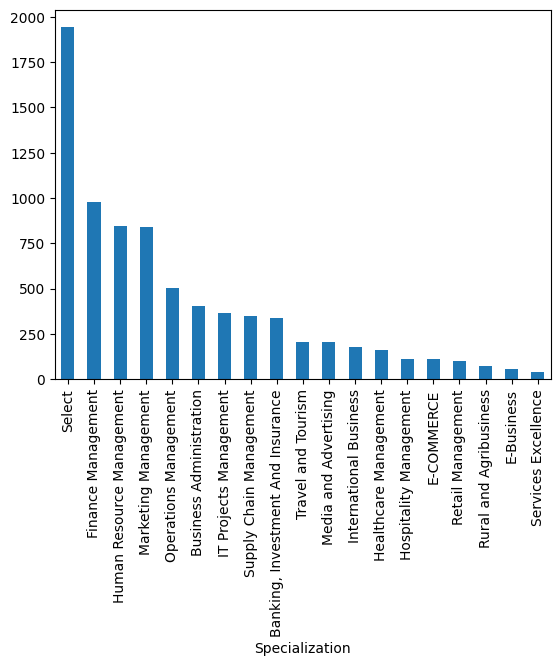

In [386]:
## Lets us the column country
lead_df['Specialization'].value_counts().plot.bar()
plt.show()

In [387]:
### Lets check null values percentage in columns
round((lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                        0.00
Lead Source                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        0.01
Total Time Spent on Website        0.00
Page Views Per Visit               0.01
Last Activity                      0.01
Specialization                     0.16
What is your current occupation    0.29
dtype: float64

In [388]:
## we need this 'What is your current occupation' feature as it define whom we want to communicate effectively
## we need drop the values which has null values
lead_df = lead_df[~lead_df['What is your current occupation'].isnull()]

In [389]:
lead_df = lead_df[~lead_df['Lead Source'].isnull()]

In [390]:
lead_df = lead_df[~lead_df['TotalVisits'].isnull()]

In [391]:
lead_df.dropna(inplace=True)

In [392]:
lead_df.shape

(6373, 10)

In [393]:
lead_df.isnull().sum()

Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
dtype: int64

In [394]:
lead_df.shape

(6373, 10)

## Handling Outliers

In [395]:
num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [396]:
lead_df.describe(percentiles=[.1,.2,.25 , .5 , .75 , .90 , .95 ,0.97, .99])

Converted  TotalVisits  Total Time Spent on Website  \
count  6373.000000  6373.000000                  6373.000000   
mean      0.480935     3.624196                   535.224541   
std       0.499676     5.048555                   565.374753   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
20%       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    34.000000   
50%       0.000000     3.000000                   287.000000   
75%       1.000000     5.000000                  1022.000000   
90%       1.000000     8.000000                  1428.800000   
95%       1.000000    10.000000                  1592.400000   
97%       1.000000    12.000000                  1685.520000   
99%       1.000000    18.000000                  1849.280000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           6373.000000  
mean               2.480464  
std                2.167364  
min                0.000000  
10%                0.000000  
20%                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.500000  
90%                5.000000  
95%                6.000000  
97%                7.000000  
99%                9.000000  
max               55.000000

In [397]:
percentile_97 = lead_df[num_col].quantile(0.99)
percentile_97

TotalVisits                      18.00
Total Time Spent on Website    1849.28
Page Views Per Visit              9.00
Name: 0.99, dtype: float64

In [398]:

for col in num_col:
    lead_df = lead_df[lead_df[col] <= percentile_97[col]]

In [399]:
lead_df.shape

(6212, 10)

### Now we get rid of all Null Values i.e, with zero Null Values
### Now our Data is clean and ready for Analysis

# Step 3 : Data Analysis

### Univariate Analysis

In [400]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6212 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6212 non-null   object 
 1   Lead Source                      6212 non-null   object 
 2   Do Not Email                     6212 non-null   object 
 3   Converted                        6212 non-null   int64  
 4   TotalVisits                      6212 non-null   float64
 5   Total Time Spent on Website      6212 non-null   int64  
 6   Page Views Per Visit             6212 non-null   float64
 7   Last Activity                    6212 non-null   object 
 8   Specialization                   6212 non-null   object 
 9   What is your current occupation  6212 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 533.8+ KB


In [401]:
lead_df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  6212.000000  6212.000000                  6212.000000   
mean      0.477785     3.315035                   517.474404   
std       0.499546     2.990848                   548.849135   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    30.000000   
50%       0.000000     3.000000                   276.500000   
75%       1.000000     5.000000                  1002.250000   
max       1.000000    18.000000                  1849.000000   

       Page Views Per Visit  
count           6212.000000  
mean               2.379007  
std                1.891339  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.330000  
max                9.000000

In [402]:
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

### Univariate Analysis on Categorical Columns or features

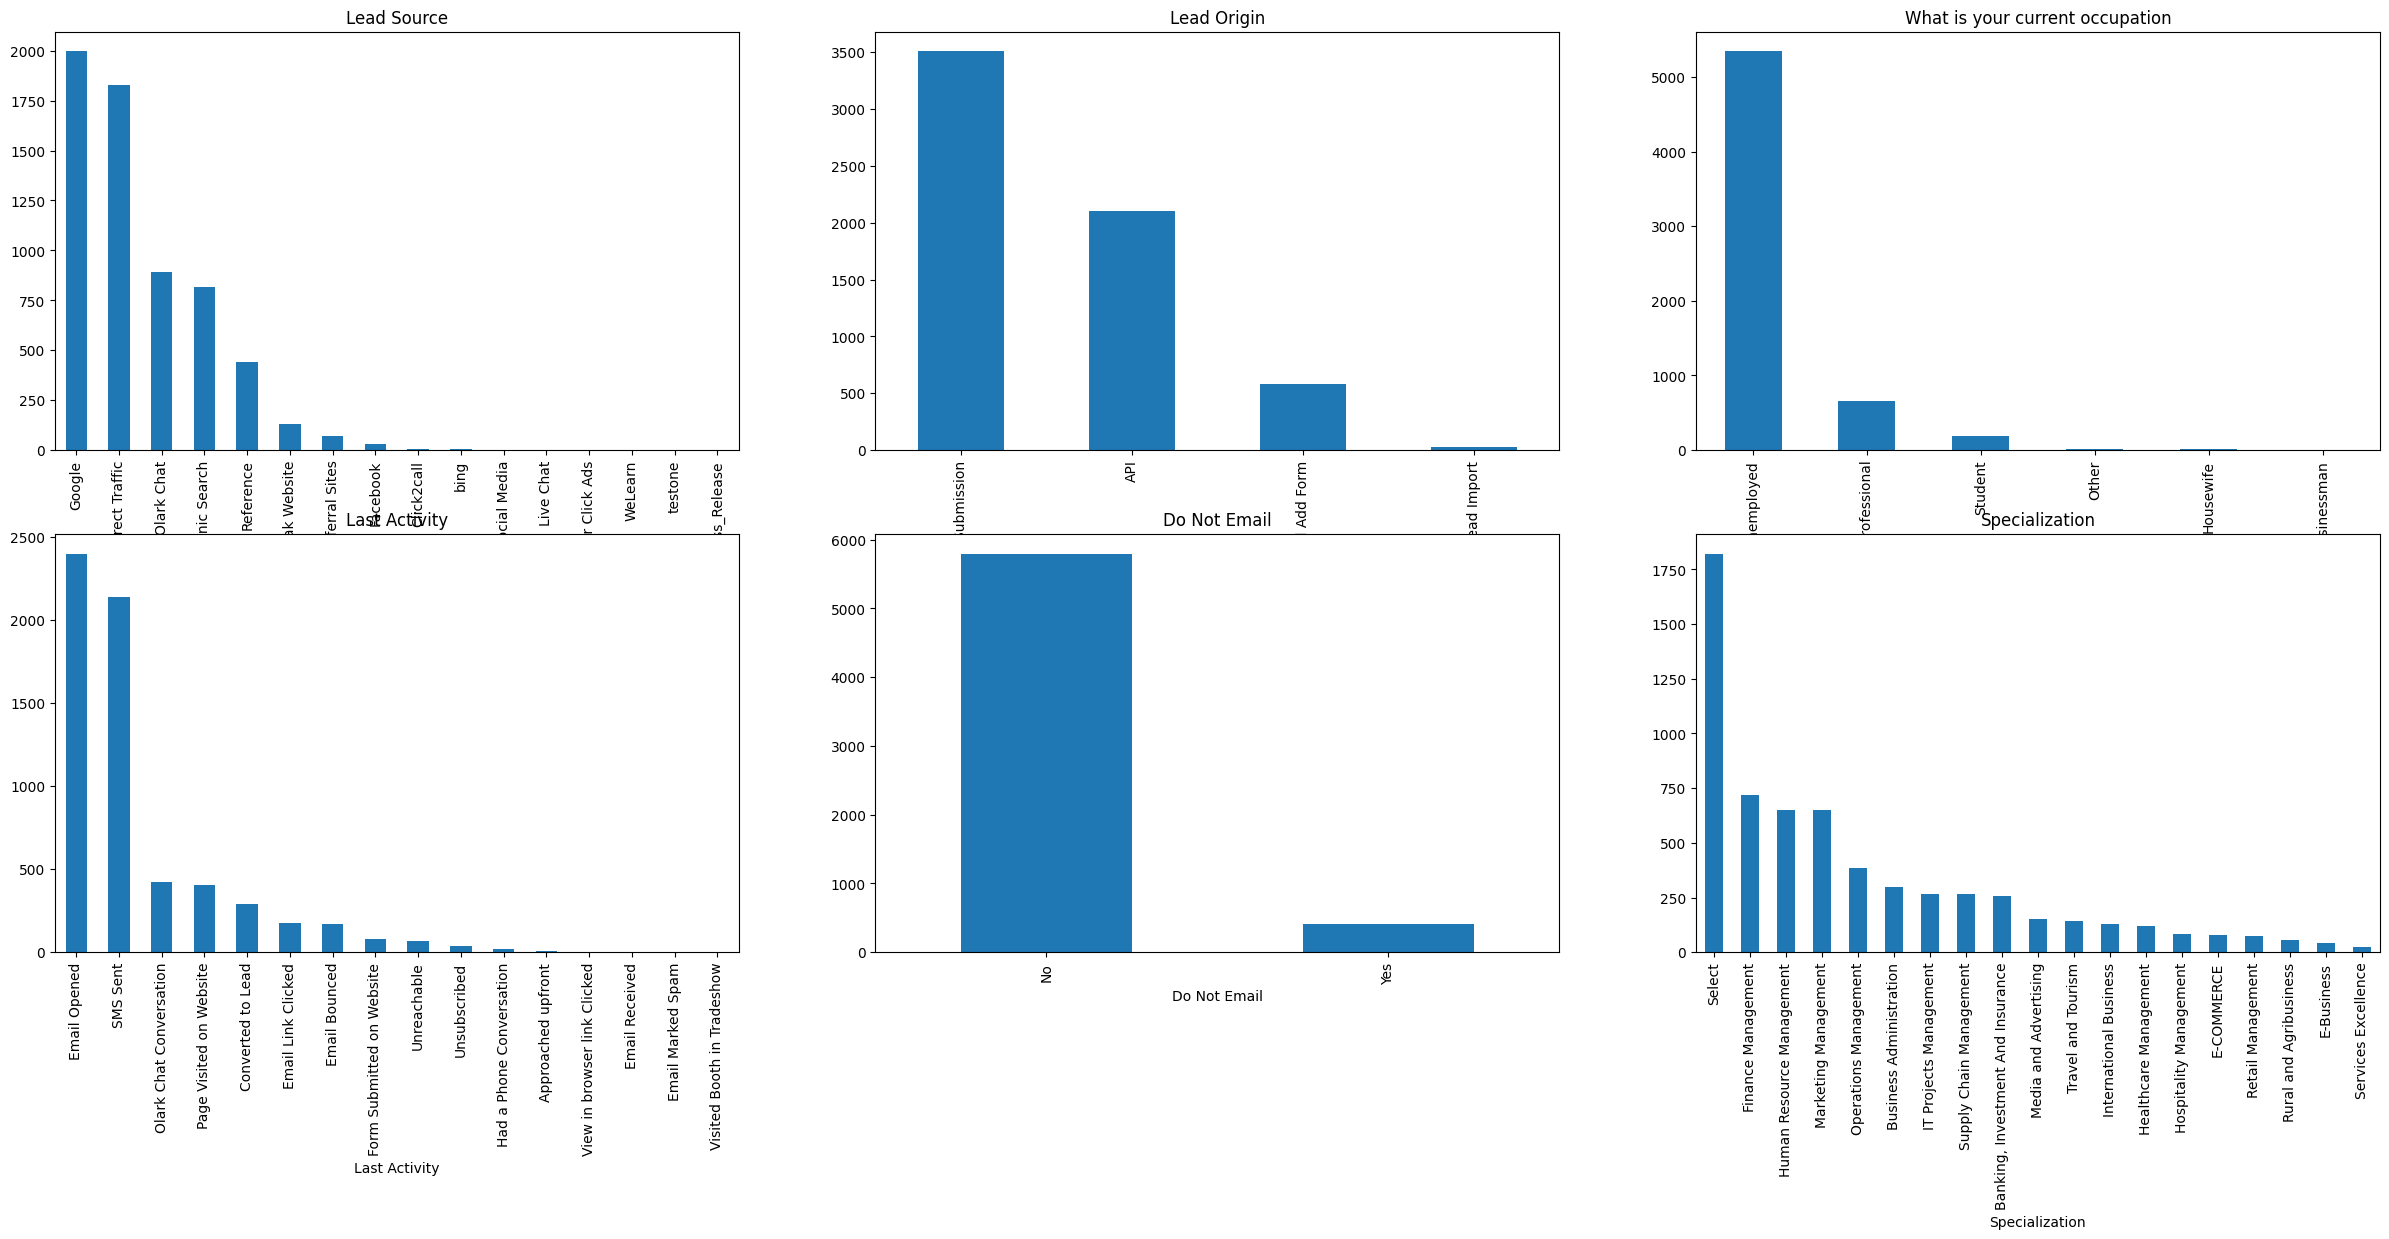

In [403]:
## Understanding the categorical Variable
cat_col = ['Lead Source','Lead Origin','What is your current occupation','Last Activity','Do Not Email','Specialization']
plt.figure(figsize=(30,25))
k = 0
for col in cat_col:
    k = k +1
    plt.subplot(4,3,k)
    lead_df[col].value_counts().plot.bar()
    plt.title(col)

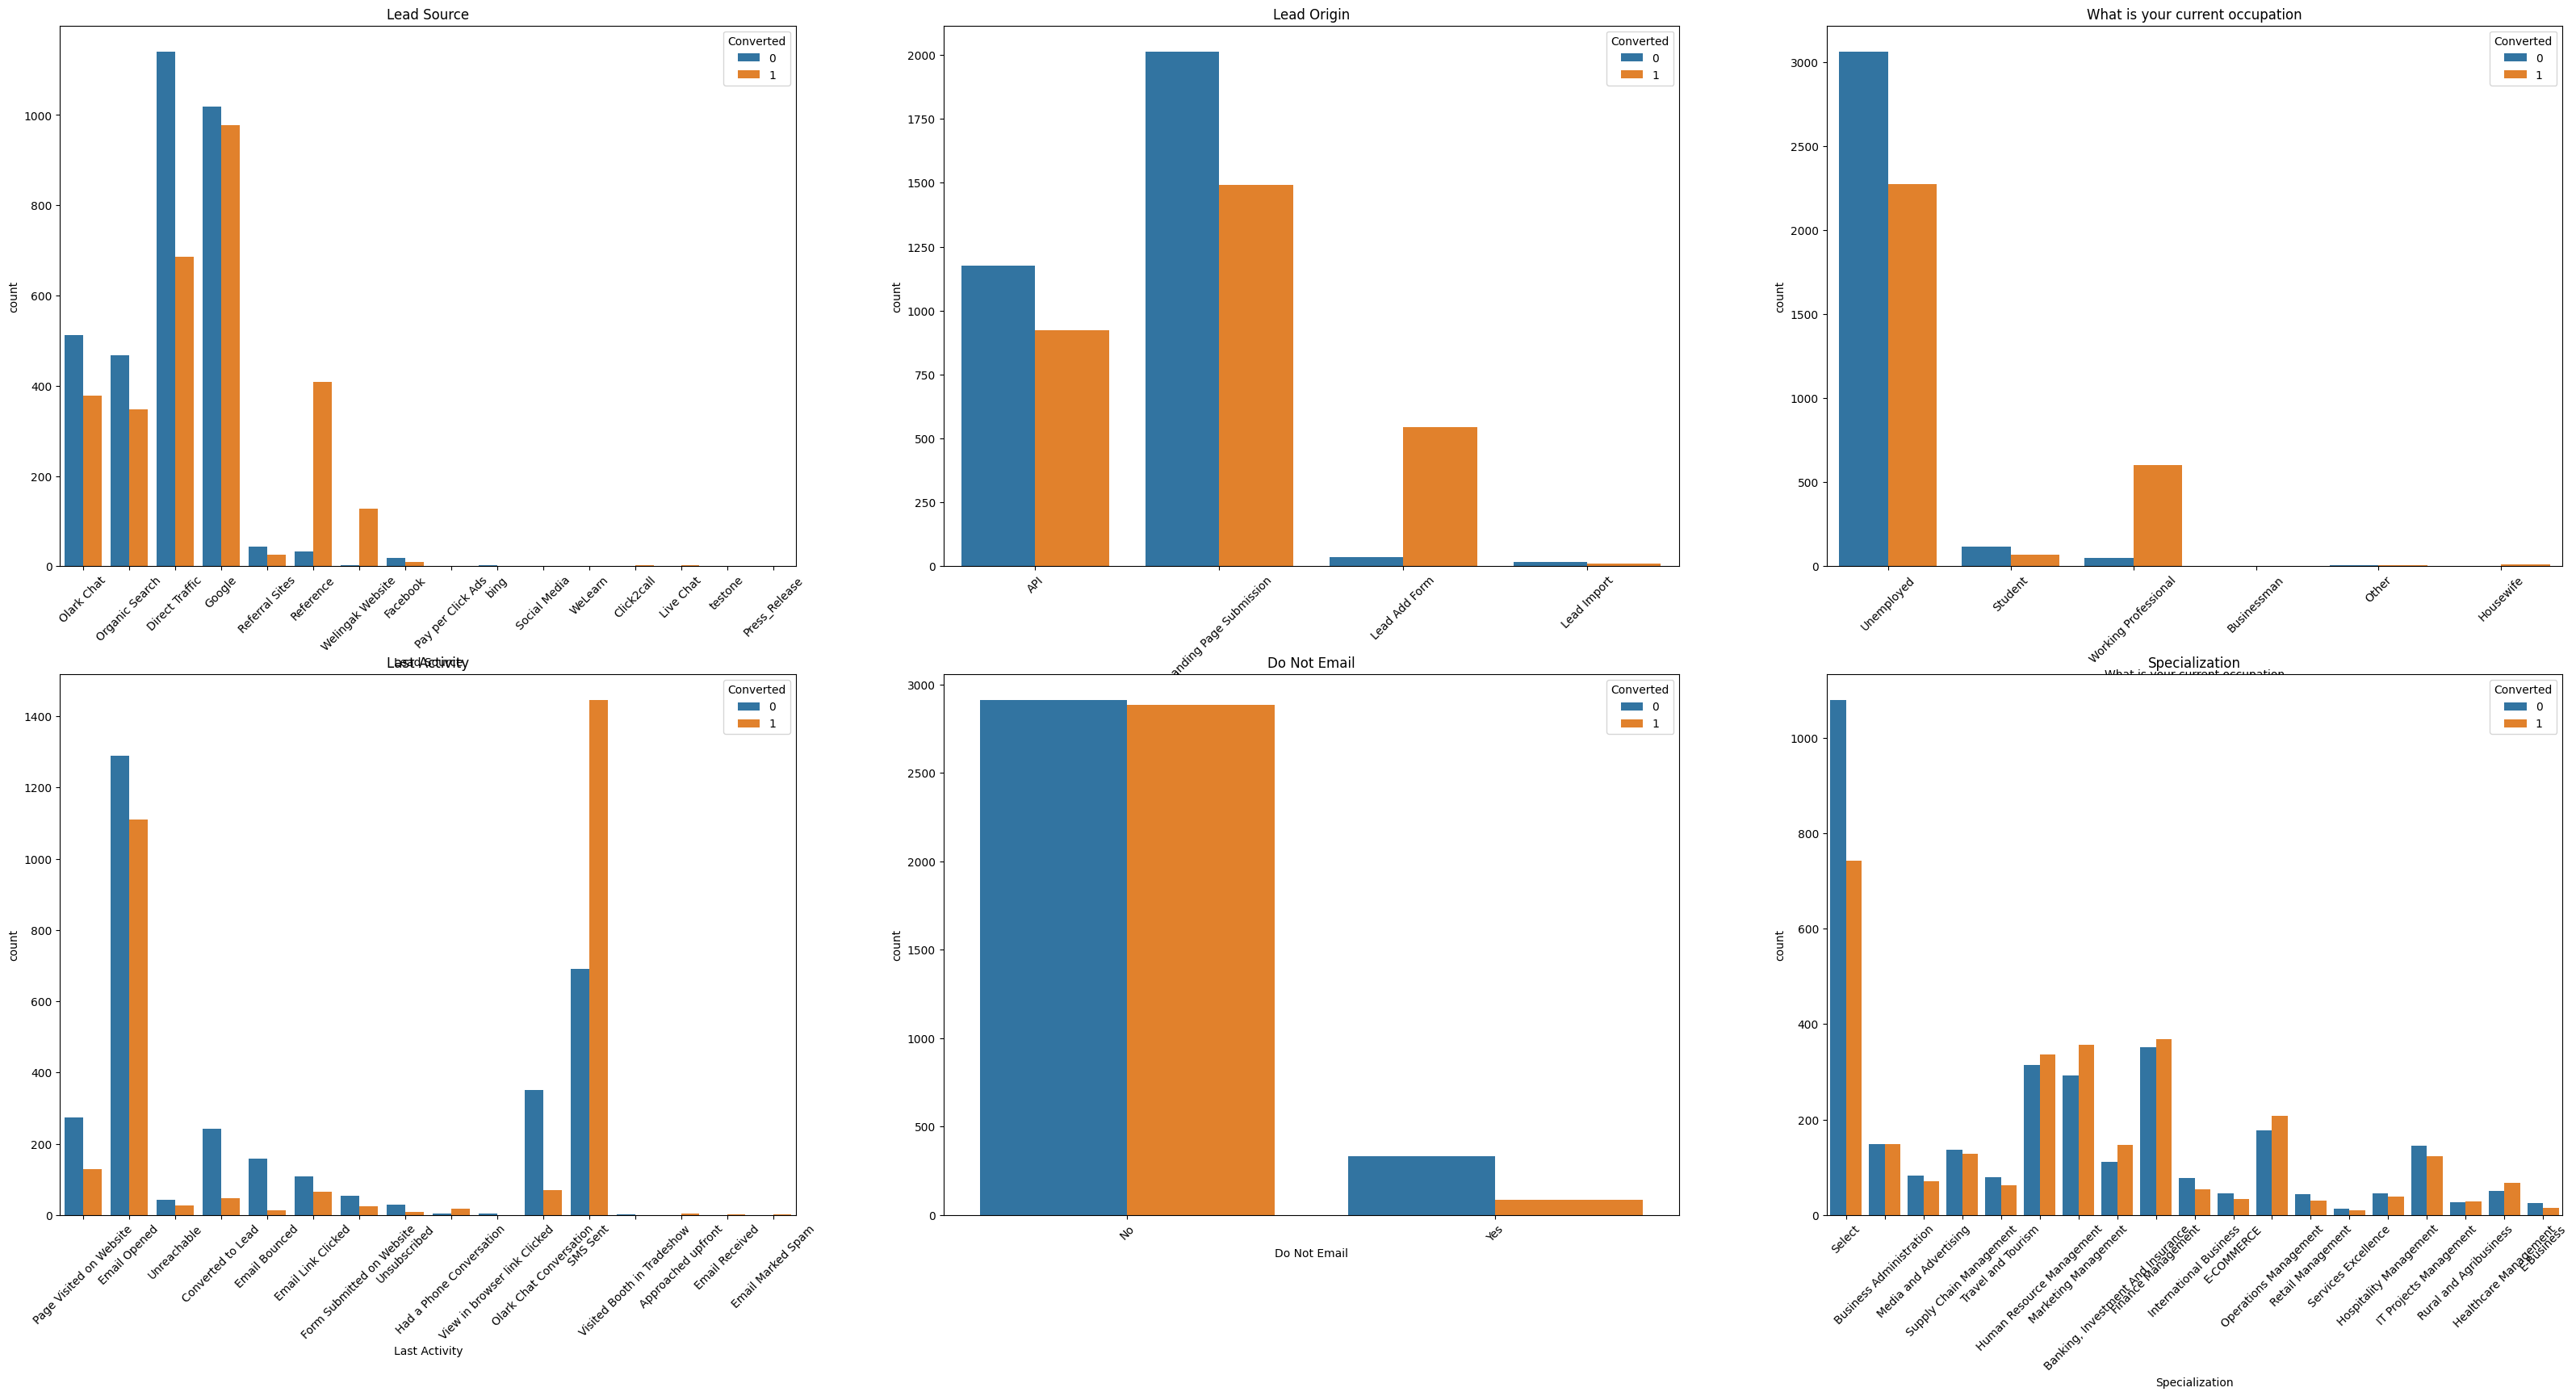

In [404]:
## Understanding the categorical Variable with Target Variable
cat_col = ['Lead Source','Lead Origin','What is your current occupation','Last Activity','Do Not Email','Specialization']
plt.figure(figsize=(40,40))
k = 0
for col in cat_col:
    k = k +1
    plt.subplot(4,3,k)
    sns.countplot(x=col,hue='Converted',data=lead_df)
    plt.xticks(rotation = 45)
    plt.title(col)

#### From the above analysis we understood that:

Lead Score : We understood most of the source of lead from Google , Direct Traffic etc...

Lead Orgin : We understood most of the The origin identifier with which the customer was identified to be      lead through Landing Page Submission,API,etc.

Current Occupation : We understand that most of Leads conversion are Unemloyed so we need focus un unemployed.

Last Activity : We understand most of the leads are last activity are Email opened , SMS etc..
Leads are contacted with through mails,sms etc...

Do not email : Most of leads are not interested to recieve mail to them

Specilization : we identified the domains they need


### Univariate Analysis on Numerical Columns or features

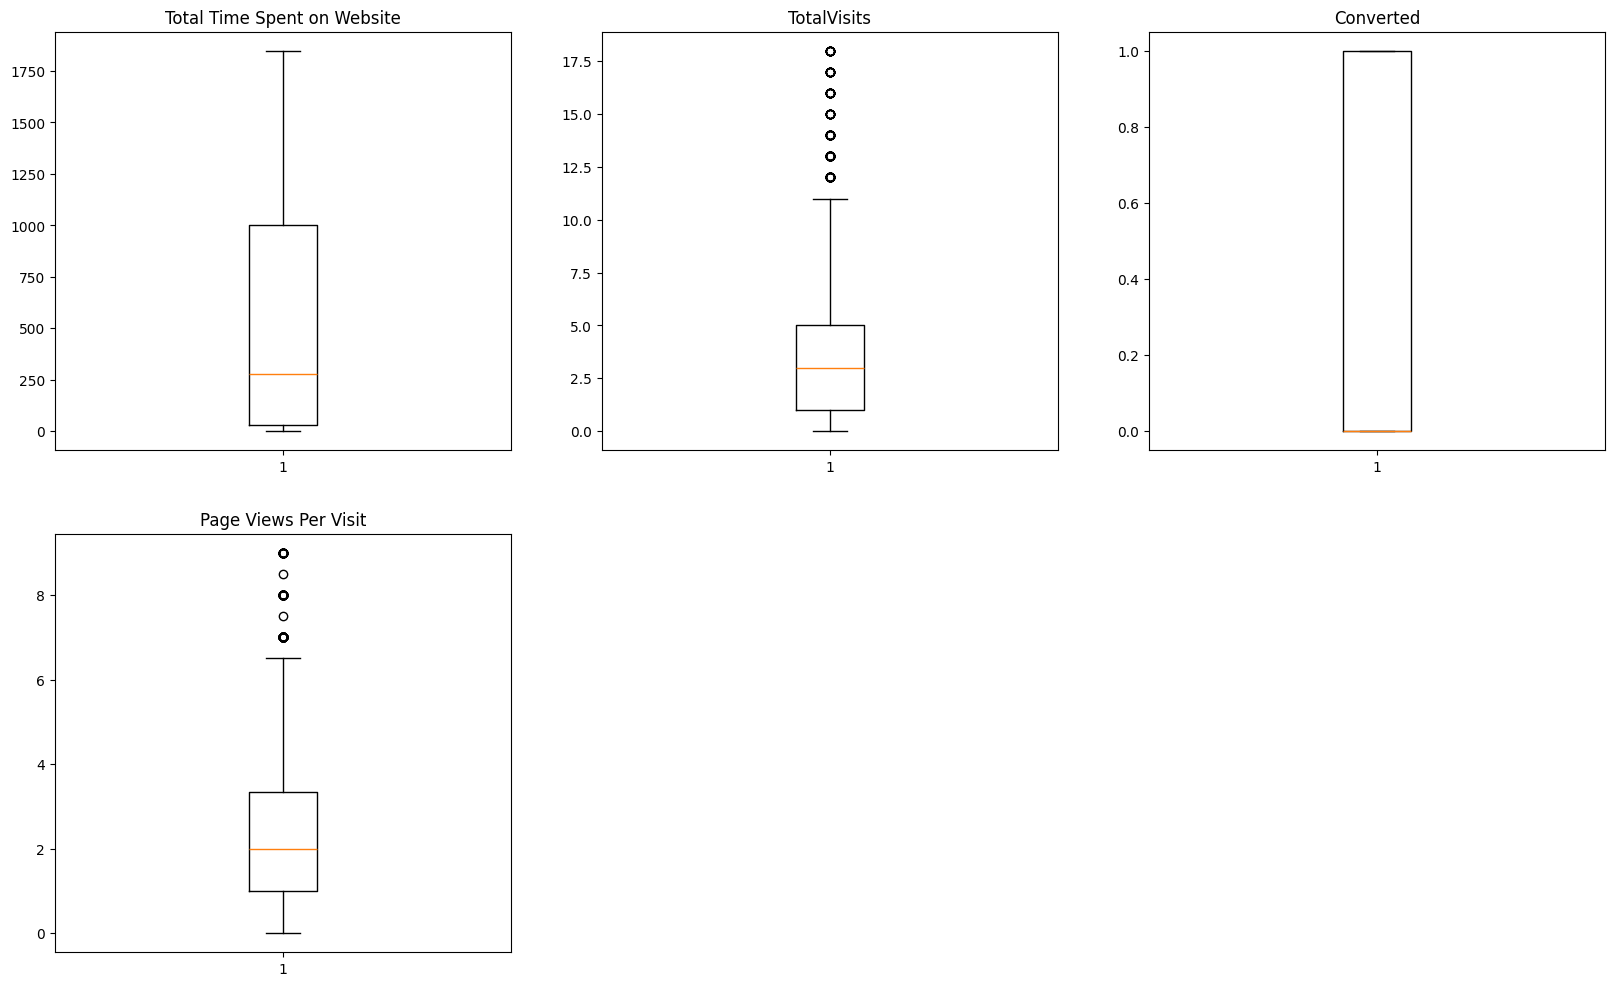

In [405]:
## Understanding Numerical Variable
num_col = ['Total Time Spent on Website','TotalVisits','Converted','Page Views Per Visit']
plt.figure(figsize=(20,25))
k = 0
for col in num_col:
    k = k +1
    plt.subplot(4,3,k)
    plt.boxplot(lead_df[col])
    plt.title(col)

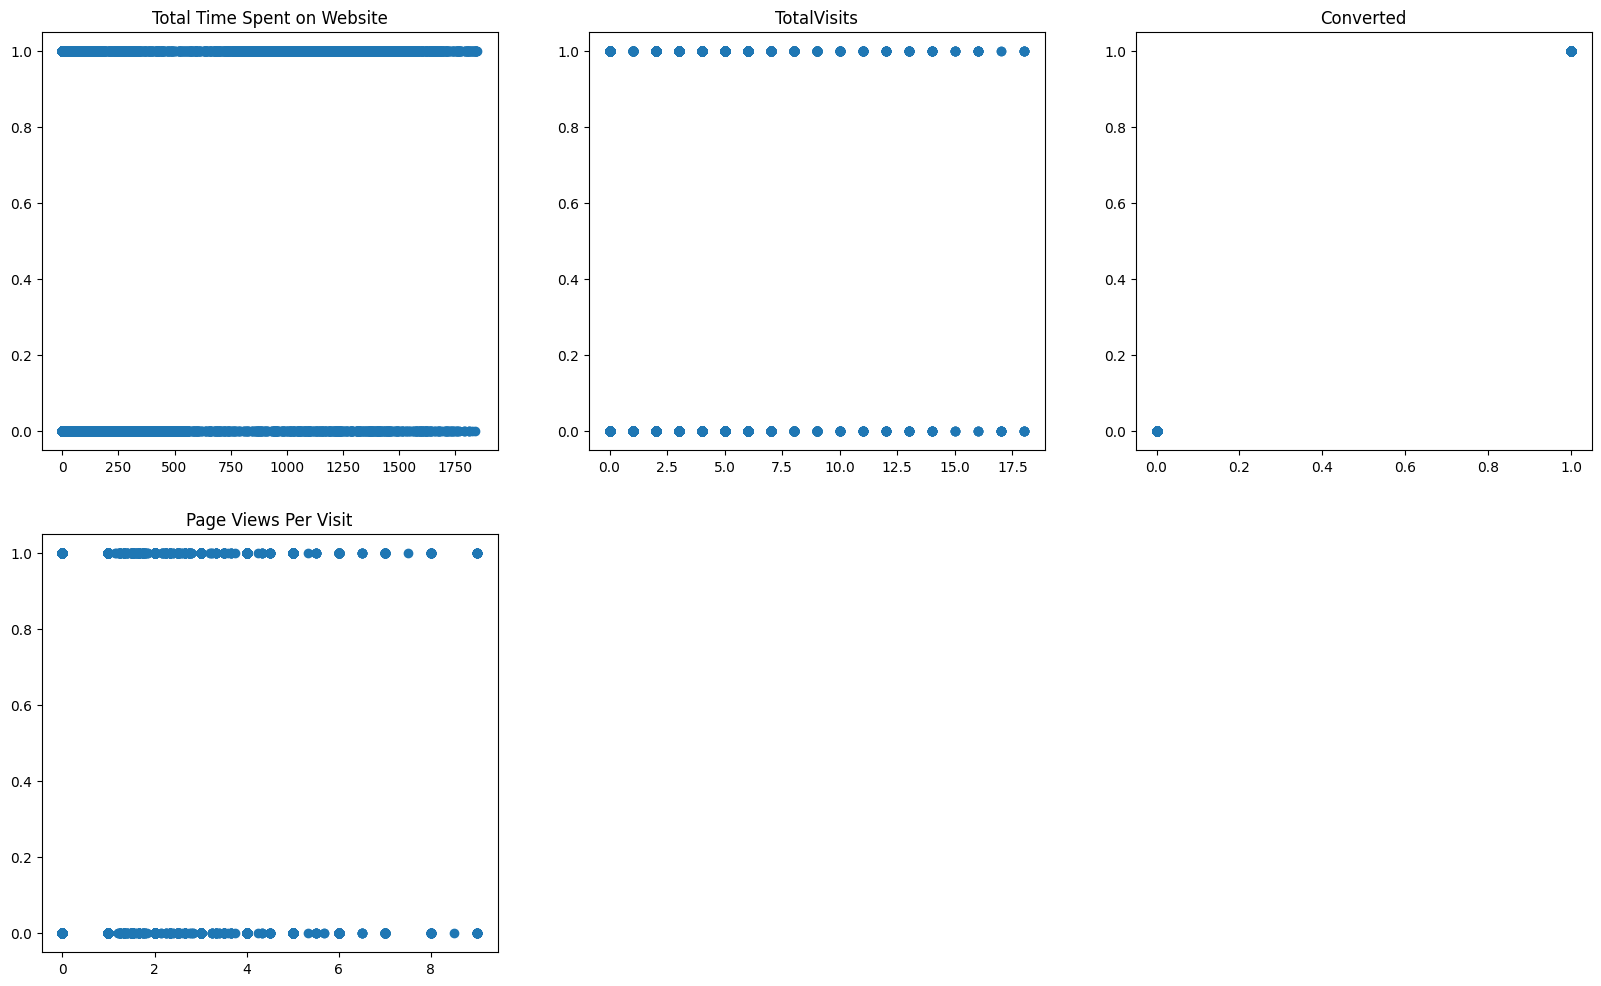

In [406]:
## Understanding Numerical Variable with Target
num_col = ['Total Time Spent on Website','TotalVisits','Converted','Page Views Per Visit']
plt.figure(figsize=(20,25))
k = 0
for col in num_col:
    k = k +1
    plt.subplot(4,3,k)
    plt.scatter(lead_df[col],lead_df['Converted'])
    plt.title(col)

### BiVariate Analysis

#### We see that how numeric values have relation with others

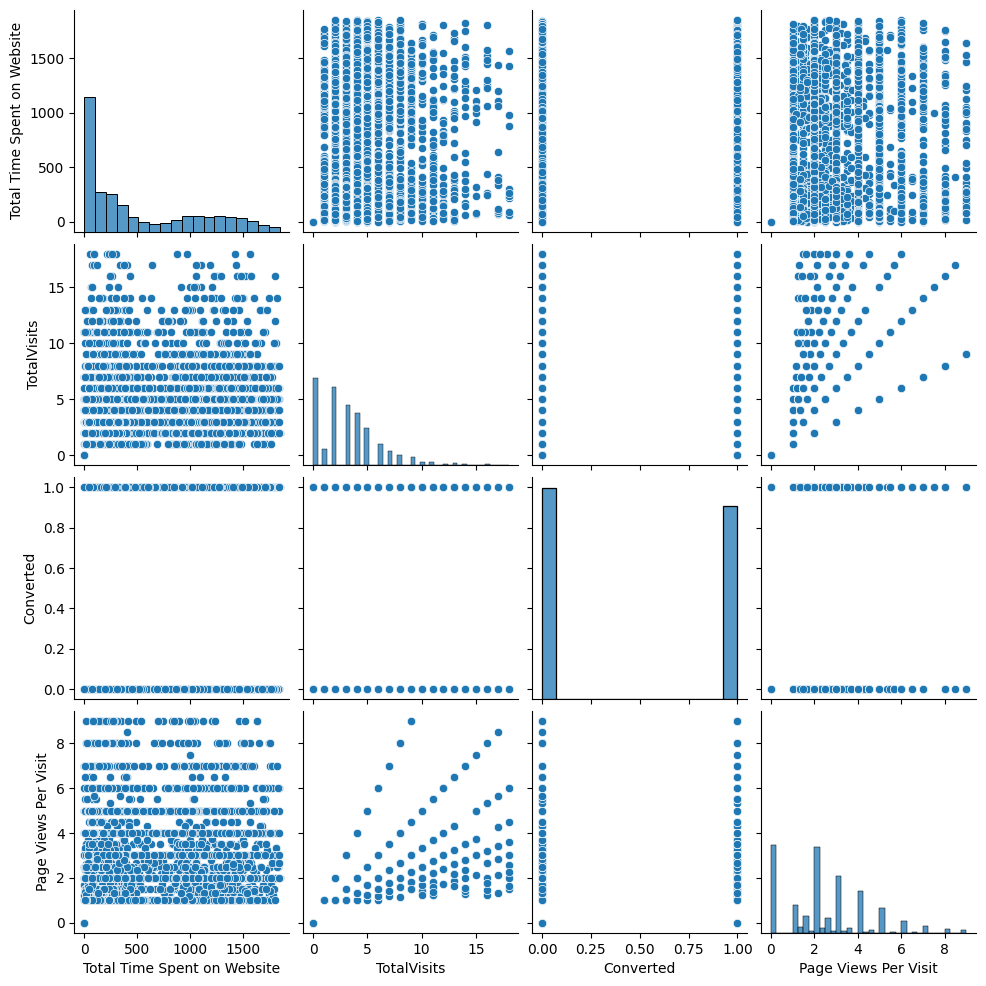

In [407]:
## We see that how numeric values have relation with others
sns.pairplot(data=lead_df,vars=num_col)
plt.show()

Quantify using correlation values

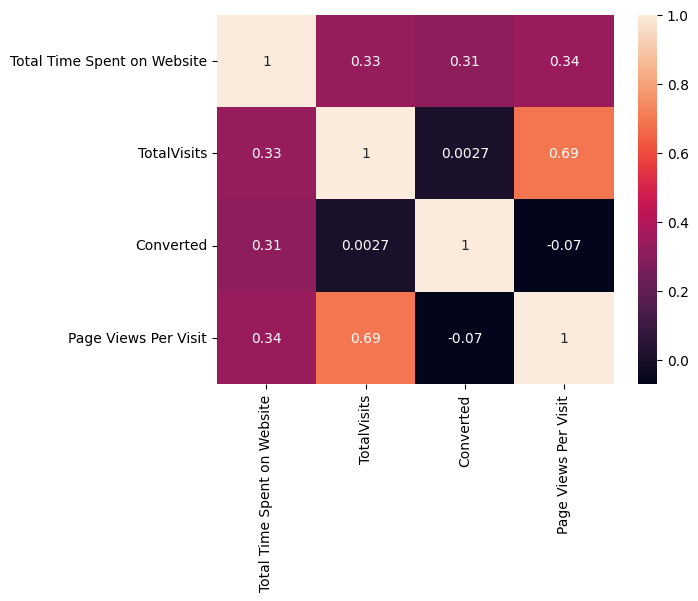

In [408]:
### We can see how numeric values corelation with others
sns.heatmap(lead_df[num_col].corr(),annot=True)
plt.show()

In [409]:
lead_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

# Step 4 : Preparing the Data

#### Converting categorical variables with two levels to binary variables.

In [410]:
print(cat_col)

['Lead Source', 'Lead Origin', 'What is your current occupation', 'Last Activity', 'Do Not Email', 'Specialization']


In [411]:
lead_df.head(4)

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed

### Dummy variables
Converting other categorical variables with more than two levels to dummy variables. We have to create (n-1) dummy variables by removing the base status. `n` is the number of levels of the variables. 

In [412]:
## We are creating dummy variable for email
Email = pd.get_dummies(lead_df['Do Not Email'],drop_first=True,dtype=int)
Email.head()

Yes
0    0
1    0
2    0
3    0
4    0

In [413]:
## Renaming the column name
Email = Email.rename(columns={"Yes":"Do Not Email_yes"})
Email.head()

Do Not Email_yes
0                 0
1                 0
2                 0
3                 0
4                 0

In [414]:
## Concatnating the dummy values with DataFrmae
lead_df = pd.concat([lead_df,Email],axis=1)

In [415]:
## Droping the Original Column
lead_df.drop('Do Not Email',axis=1,inplace=True)

In [416]:
## We are creating dummy variable for Lead Source
Leadsource = pd.get_dummies(lead_df['Lead Source'],drop_first=True,dtype=int)
Leadsource.head()

Direct Traffic  Facebook  Google  Live Chat  Olark Chat  Organic Search  \
0               0         0       0          0           1               0   
1               0         0       0          0           0               1   
2               1         0       0          0           0               0   
3               1         0       0          0           0               0   
4               0         0       1          0           0               0   

   Pay per Click Ads  Press_Release  Reference  Referral Sites  Social Media  \
0                  0              0          0               0             0   
1                  0              0          0               0             0   
2                  0              0          0               0             0   
3                  0              0          0               0             0   
4                  0              0          0               0             0   

   WeLearn  Welingak Website  bing  testone  
0        0                 0     0        0  
1        0                 0     0        0  
2        0                 0     0        0  
3        0                 0     0        0  
4        0                 0     0        0

In [417]:
Leadsource.columns

Index(['Direct Traffic', 'Facebook', 'Google', 'Live Chat', 'Olark Chat',
       'Organic Search', 'Pay per Click Ads', 'Press_Release', 'Reference',
       'Referral Sites', 'Social Media', 'WeLearn', 'Welingak Website', 'bing',
       'testone'],
      dtype='object')

In [418]:
## Renaming the column name
Leadsource = Leadsource.rename(columns={
    'Direct Traffic': 'LeadSource(Direct Traffic)',
    'Facebook': 'Leadsource(Facebook)',
    'Google': 'Leadsource(Google)',
    'Live Chat': 'Leadsource(Live Chat)',
    'Olark Chat': 'Leadsource(Olark Chat)',
    'Organic Search': 'Leadsource(Organic Search)',
    'Pay per Click Ads': 'Leadsource(Pay per Click Ads)',
    'Reference': 'Leadsource(Reference)',
    'Referral Sites': 'Leadsource(Referral Sites)',
    'Social Media': 'Leadsource(Social Media)',
    'WeLearn': 'Leadsource(WeLearn)',
    'Welingak Website': 'Leadsource(Welingak Website)',
    'bing': 'Leadsource(bing)',
    'testone': 'Leadsource(testone)'
})

In [419]:
## Concatnating the dummy values with DataFrmae
lead_df = pd.concat([lead_df,Leadsource],axis=1)
lead_df.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  Do Not Email_yes  \
0                   Select                      Unemployed                 0   
1                   Select                      Unemployed                 0   
2  Business Administration                         Student                 0   
3    Media and Advertising                      Unemployed                 0   
4                   Select                      Unemployed                 0   

   ...  Leadsource(Organic Search)  Leadsource(Pay per Click Ads)  \
0  ...                           0                              0   
1  ...                           1                              0   
2  ...                           0                              0   
3  ...                           0                              0   
4  ...                           0                              0   

   Press_Release  Leadsource(Reference)  Leadsource(Referral Sites)  \
0              0                      0                           0   
1              0                      0                           0   
2              0                      0                           0   
3              0                      0                           0   
4              0                      0                           0   

   Leadsource(Social Media)  Leadsource(WeLearn)  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Leadsource(Welingak Website)  Leadsource(bing)  Leadsource(testone)  
0                             0                 0                    0  
1                             0                 0                    0  
2                             0                 0                    0  
3                             0                 0                    0  
4                             0                 0                    0  

[5 rows x 25 columns]

In [420]:
## Droping the Original Column

lead_df.drop('Lead Source',inplace=True,axis=1)

In [421]:
## We are creating dummy variable for Lead Origin
Leadorigin = pd.get_dummies(lead_df['Lead Origin'],drop_first=True,dtype=int)
Leadorigin.head()

Landing Page Submission  Lead Add Form  Lead Import
0                        0              0            0
1                        0              0            0
2                        1              0            0
3                        1              0            0
4                        1              0            0

In [422]:
## Renaming the column name
Leadorigin = Leadorigin.rename(columns={'Landing Page Submission' :'Leadorigin(Landing Page Submission)',
                                        'Lead Add Form' : 'Leadorigin(Lead Add Form)',
                                        'Lead Import' : 'Leadorigin(Lead Import)'})

In [423]:
## Concatnating the dummy values with DataFrmae
lead_df = pd.concat([lead_df,Leadorigin],axis=1)
lead_df.head(3)

Lead Origin  Converted  TotalVisits  \
0                      API          0          0.0   
1                      API          0          5.0   
2  Landing Page Submission          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   

            Specialization What is your current occupation  Do Not Email_yes  \
0                   Select                      Unemployed                 0   
1                   Select                      Unemployed                 0   
2  Business Administration                         Student                 0   

   LeadSource(Direct Traffic)  ...  Leadsource(Reference)  \
0                           0  ...                      0   
1                           0  ...                      0   
2                           1  ...                      0   

   Leadsource(Referral Sites)  Leadsource(Social Media)  Leadsource(WeLearn)  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   

   Leadsource(Welingak Website)  Leadsource(bing)  Leadsource(testone)  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   

   Leadorigin(Landing Page Submission)  Leadorigin(Lead Add Form)  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   

   Leadorigin(Lead Import)  
0                        0  
1                        0  
2                        0  

[3 rows x 27 columns]

In [424]:
## Droping the Original Column
lead_df.drop('Lead Origin',inplace=True,axis=1)

In [425]:
## We are creating dummy variable for Last Activity
Lastactivity = pd.get_dummies(lead_df['Last Activity'],drop_first=True,dtype=int)
Lastactivity.head()

Converted to Lead  Email Bounced  Email Link Clicked  Email Marked Spam  \
0                  0              0                   0                  0   
1                  0              0                   0                  0   
2                  0              0                   0                  0   
3                  0              0                   0                  0   
4                  1              0                   0                  0   

   Email Opened  Email Received  Form Submitted on Website  \
0             0               0                          0   
1             1               0                          0   
2             1               0                          0   
3             0               0                          0   
4             0               0                          0   

   Had a Phone Conversation  Olark Chat Conversation  Page Visited on Website  \
0                         0                        0                        1   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   

   SMS Sent  Unreachable  Unsubscribed  View in browser link Clicked  \
0         0            0             0                             0   
1         0            0             0                             0   
2         0            0             0                             0   
3         0            1             0                             0   
4         0            0             0                             0   

   Visited Booth in Tradeshow  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [426]:
## Renaming the column name
Lastactivity = Lastactivity.rename(columns={
    'Converted to Lead': 'Leadactivity(Converted to Lead)',
    'Email Bounced': 'Leadactivity(Email Bounced)',
    'Email Link Clicked': 'Leadactivity(Email Link Clicked)',
    'Email Marked Spam': 'Leadactivity(Email Marked Spam)',
    'Email Opened': 'Leadactivity(Email Opened)',
    'Email Received': 'Leadactivity(Email Received)',
    'Form Submitted on Website': 'Leadactivity(Form Submitted on Website)',
    'Had a Phone Conversation': 'Leadactivity(Had a Phone Conversation)',
    'Olark Chat Conversation': 'Leadactivity(Olark Chat Conversation)',
    'Page Visited on Website': 'Leadactivity(Page Visited on Website)',
    'SMS Sent': 'Leadactivity(SMS Sent)',
    'Unreachable': 'Leadactivity(Unreachable)',
    'Unsubscribed': 'Leadactivity(Unsubscribed)',
    'View in browser link Clicked': 'Leadactivity(View in browser link Clicked)',
    'Visited Booth in Tradeshow': 'Leadactivity(Visited Booth in Tradeshow)'
})

In [427]:
## Concatnating the dummy values with DataFrmae
lead_df = pd.concat([lead_df,Lastactivity],axis=1)
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  Do Not Email_yes  \
0                      Unemployed                 0   
1                      Unemployed                 0   
2                         Student                 0   
3                      Unemployed                 0   
4                      Unemployed                 0   

   LeadSource(Direct Traffic)  Leadsource(Facebook)  ...  \
0                           0                     0  ...   
1                           0                     0  ...   
2                           1                     0  ...   
3                           1                     0  ...   
4                           0                     0  ...   

   Leadactivity(Email Received)  Leadactivity(Form Submitted on Website)  \
0                             0                                        0   
1                             0                                        0   
2                             0                                        0   
3                             0                                        0   
4                             0                                        0   

   Leadactivity(Had a Phone Conversation)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Leadactivity(Olark Chat Conversation)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Leadactivity(Page Visited on Website)  Leadactivity(SMS Sent)  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Leadactivity(Unreachable)  Leadactivity(Unsubscribed)  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Leadactivity(View in browser link Clicked)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Leadactivity(Visited Booth in Tradeshow)  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 41 columns]

In [428]:
## Droping the Original Column
lead_df.drop('Last Activity',inplace=True,axis=1)

In [429]:
## We are creating dummy variable for Current Occupation
Cur_Occu = pd.get_dummies(lead_df['What is your current occupation'],drop_first=True,dtype=int)
Cur_Occu.head()

Housewife  Other  Student  Unemployed  Working Professional
0          0      0        0           1                     0
1          0      0        0           1                     0
2          0      0        1           0                     0
3          0      0        0           1                     0
4          0      0        0           1                     0

In [430]:
## Renaming the column name
Cur_Occu = Cur_Occu.rename(columns={'Housewife' : 'Cur_Occu(Housewife)','Other' : 'Cur_Occu(Other)',
                                    'Student' : 'Cur_Occu(Student)' ,'Unemployed' : 'Cur_Occu(Unemployed)' ,
                                     'Working Professional' : 'Cur_Occu(Working Professional)' })

In [431]:
## Droping the Original Column
lead_df.drop('What is your current occupation',inplace=True,axis=1)

In [432]:
## Concatnating the dummy values with DataFrmae
lead_df = pd.concat([lead_df,Cur_Occu],axis=1)
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

            Specialization  Do Not Email_yes  LeadSource(Direct Traffic)  \
0                   Select                 0                           0   
1                   Select                 0                           0   
2  Business Administration                 0                           1   
3    Media and Advertising                 0                           1   
4                   Select                 0                           0   

   Leadsource(Facebook)  Leadsource(Google)  Leadsource(Live Chat)  ...  \
0                     0                   0                      0  ...   
1                     0                   0                      0  ...   
2                     0                   0                      0  ...   
3                     0                   0                      0  ...   
4                     0                   1                      0  ...   

   Leadactivity(SMS Sent)  Leadactivity(Unreachable)  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          1   
4                       0                          0   

   Leadactivity(Unsubscribed)  Leadactivity(View in browser link Clicked)  \
0                           0                                           0   
1                           0                                           0   
2                           0                                           0   
3                           0                                           0   
4                           0                                           0   

   Leadactivity(Visited Booth in Tradeshow)  Cur_Occu(Housewife)  \
0                                         0                    0   
1                                         0                    0   
2                                         0                    0   
3                                         0                    0   
4                                         0                    0   

   Cur_Occu(Other)  Cur_Occu(Student)  Cur_Occu(Unemployed)  \
0                0                  0                     1   
1                0                  0                     1   
2                0                  1                     0   
3                0                  0                     1   
4                0                  0                     1   

   Cur_Occu(Working Professional)  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 44 columns]

In [433]:
## We are creating dummy variable for email
## Concatnating the dummy values with DataFrmae
dummy_specializtion = pd.get_dummies(lead_df['Specialization'], prefix = 'Specialization',dtype=int)
dummy_specializtion = dummy_specializtion.drop(['Specialization_Select'], axis=1)
lead_df = pd.concat([lead_df, dummy_specializtion], axis = 1)
dummy_specializtion.head()

Specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0 

In [434]:
## Droping the original variable
lead_df.drop('Specialization',inplace=True,axis=1)

In [435]:
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Do Not Email_yes  LeadSource(Direct Traffic)  Leadsource(Facebook)  \
0                 0                           0                     0   
1                 0                           0                     0   
2                 0                           1                     0   
3                 0                           1                     0   
4                 0                           0                     0   

   Leadsource(Google)  Leadsource(Live Chat)  Leadsource(Olark Chat)  ...  \
0                   0                      0                       1  ...   
1                   0                      0                       0  ...   
2                   0                      0                       0  ...   
3                   0                      0                       0  ...   
4                   1                      0                       0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 61 columns]

# Step 5: Model Building

### Train Test Split

In [436]:
## importing Train_Test_split Library
from sklearn.model_selection import train_test_split

Spiliting Independent and Target Variable

In [437]:
## Independent Variables
X = lead_df.drop('Converted',axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Do Not Email_yes  LeadSource(Direct Traffic)  Leadsource(Facebook)  \
0                 0                           0                     0   
1                 0                           0                     0   
2                 0                           1                     0   
3                 0                           1                     0   
4                 0                           0                     0   

   Leadsource(Google)  Leadsource(Live Chat)  Leadsource(Olark Chat)  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Leadsource(Organic Search)  ...  Specialization_IT Projects Management  \
0                           0  ...                                      0   
1                           1  ...                                      0   
2                           0  ...                                      0   
3                           0  ...                                      0   
4                           0  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 60 columns]

In [438]:
## Target Variable
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Spliting Train and Test Data

In [439]:
## Spliting Train and Test Data
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [440]:
## Shape of Train Data
X_train.shape

(4348, 60)

In [441]:
## Shape of Test Data
X_test.shape

(1864, 60)

### Feature Scaling

Feature Scaling is defined as the getting all the numeric variables to the same scale, for not skewing the data with only some variable

In [442]:
X_train.head(5)

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8560          2.0                          455                   1.0   
2647          0.0                            0                   0.0   
1190          4.0                         1621                   4.0   
7830          3.0                          432                   1.5   
7294          1.0                           24                   1.0   

      Do Not Email_yes  LeadSource(Direct Traffic)  Leadsource(Facebook)  \
8560                 0                           0                     0   
2647                 0                           0                     0   
1190                 0                           0                     0   
7830                 0                           1                     0   
7294                 0                           1                     0   

      Leadsource(Google)  Leadsource(Live Chat)  Leadsource(Olark Chat)  \
8560                   1                      0                       0   
2647                   0                      0                       1   
1190                   1                      0                       0   
7830                   0                      0                       0   
7294                   0                      0                       0   

      Leadsource(Organic Search)  ...  Specialization_IT Projects Management  \
8560                           0  ...                                      0   
2647                           0  ...                                      0   
1190                           0  ...                                      0   
7830                           0  ...                                      0   
7294                           0  ...                                      0   

      Specialization_International Business  \
8560                                      0   
2647                                      0   
1190                                      0   
7830                                      0   
7294                                      0   

      Specialization_Marketing Management  \
8560                                    0   
2647                                    0   
1190                                    0   
7830                                    0   
7294                                    0   

      Specialization_Media and Advertising  \
8560                                     0   
2647                                     0   
1190                                     0   
7830                                     0   
7294                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8560                                     0                                 0   
2647                                     0                                 0   
1190                                     0                                 0   
7830                                     0                                 0   
7294                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8560                                      0   
2647                                      0   
1190                                      0   
7830                                      0   
7294                                      0   

      Specialization_Services Excellence  \
8560                                   0   
2647                                   0   
1190                                   0   
7830                                   0   
7294                                   0   

      Specialization_Supply Chain Management  \
8560                                       0   
2647                                       0   
1190                                       0   
7830                                       0   
7294                                       1   

      Specialization_Travel and Tou

In [443]:
## Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [444]:
## Fit and Transform the Data
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = sc.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8560     0.111111                     0.246345              0.111111   
2647     0.000000                     0.000000              0.000000   
1190     0.222222                     0.877639              0.444444   
7830     0.166667                     0.233893              0.166667   
7294     0.055556                     0.012994              0.111111   

      Do Not Email_yes  LeadSource(Direct Traffic)  Leadsource(Facebook)  \
8560                 0                           0                     0   
2647                 0                           0                     0   
1190                 0                           0                     0   
7830                 0                           1                     0   
7294                 0                           1                     0   

      Leadsource(Google)  Leadsource(Live Chat)  Leadsource(Olark Chat)  \
8560                   1                      0                       0   
2647                   0                      0                       1   
1190                   1                      0                       0   
7830                   0                      0                       0   
7294                   0                      0                       0   

      Leadsource(Organic Search)  ...  Specialization_IT Projects Management  \
8560                           0  ...                                      0   
2647                           0  ...                                      0   
1190                           0  ...                                      0   
7830                           0  ...                                      0   
7294                           0  ...                                      0   

      Specialization_International Business  \
8560                                      0   
2647                                      0   
1190                                      0   
7830                                      0   
7294                                      0   

      Specialization_Marketing Management  \
8560                                    0   
2647                                    0   
1190                                    0   
7830                                    0   
7294                                    0   

      Specialization_Media and Advertising  \
8560                                     0   
2647                                     0   
1190                                     0   
7830                                     0   
7294                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8560                                     0                                 0   
2647                                     0                                 0   
1190                                     0                                 0   
7830                                     0                                 0   
7294                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8560                                      0   
2647                                      0   
1190                                      0   
7830                                      0   
7294                                      0   

      Specialization_Services Excellence  \
8560                                   0   
2647                                   0   
1190                                   0   
7830                                   0   
7294                                   0   

      Specialization_Supply Chain Management  \
8560                                       0   
2647                                       0   
1190                                       0   
7830                                       0   
7294                                       1   

      Specialization_Travel and Tou

### Looking at Correlations

Looking How all Varaibles Depend or correlated with others Variable

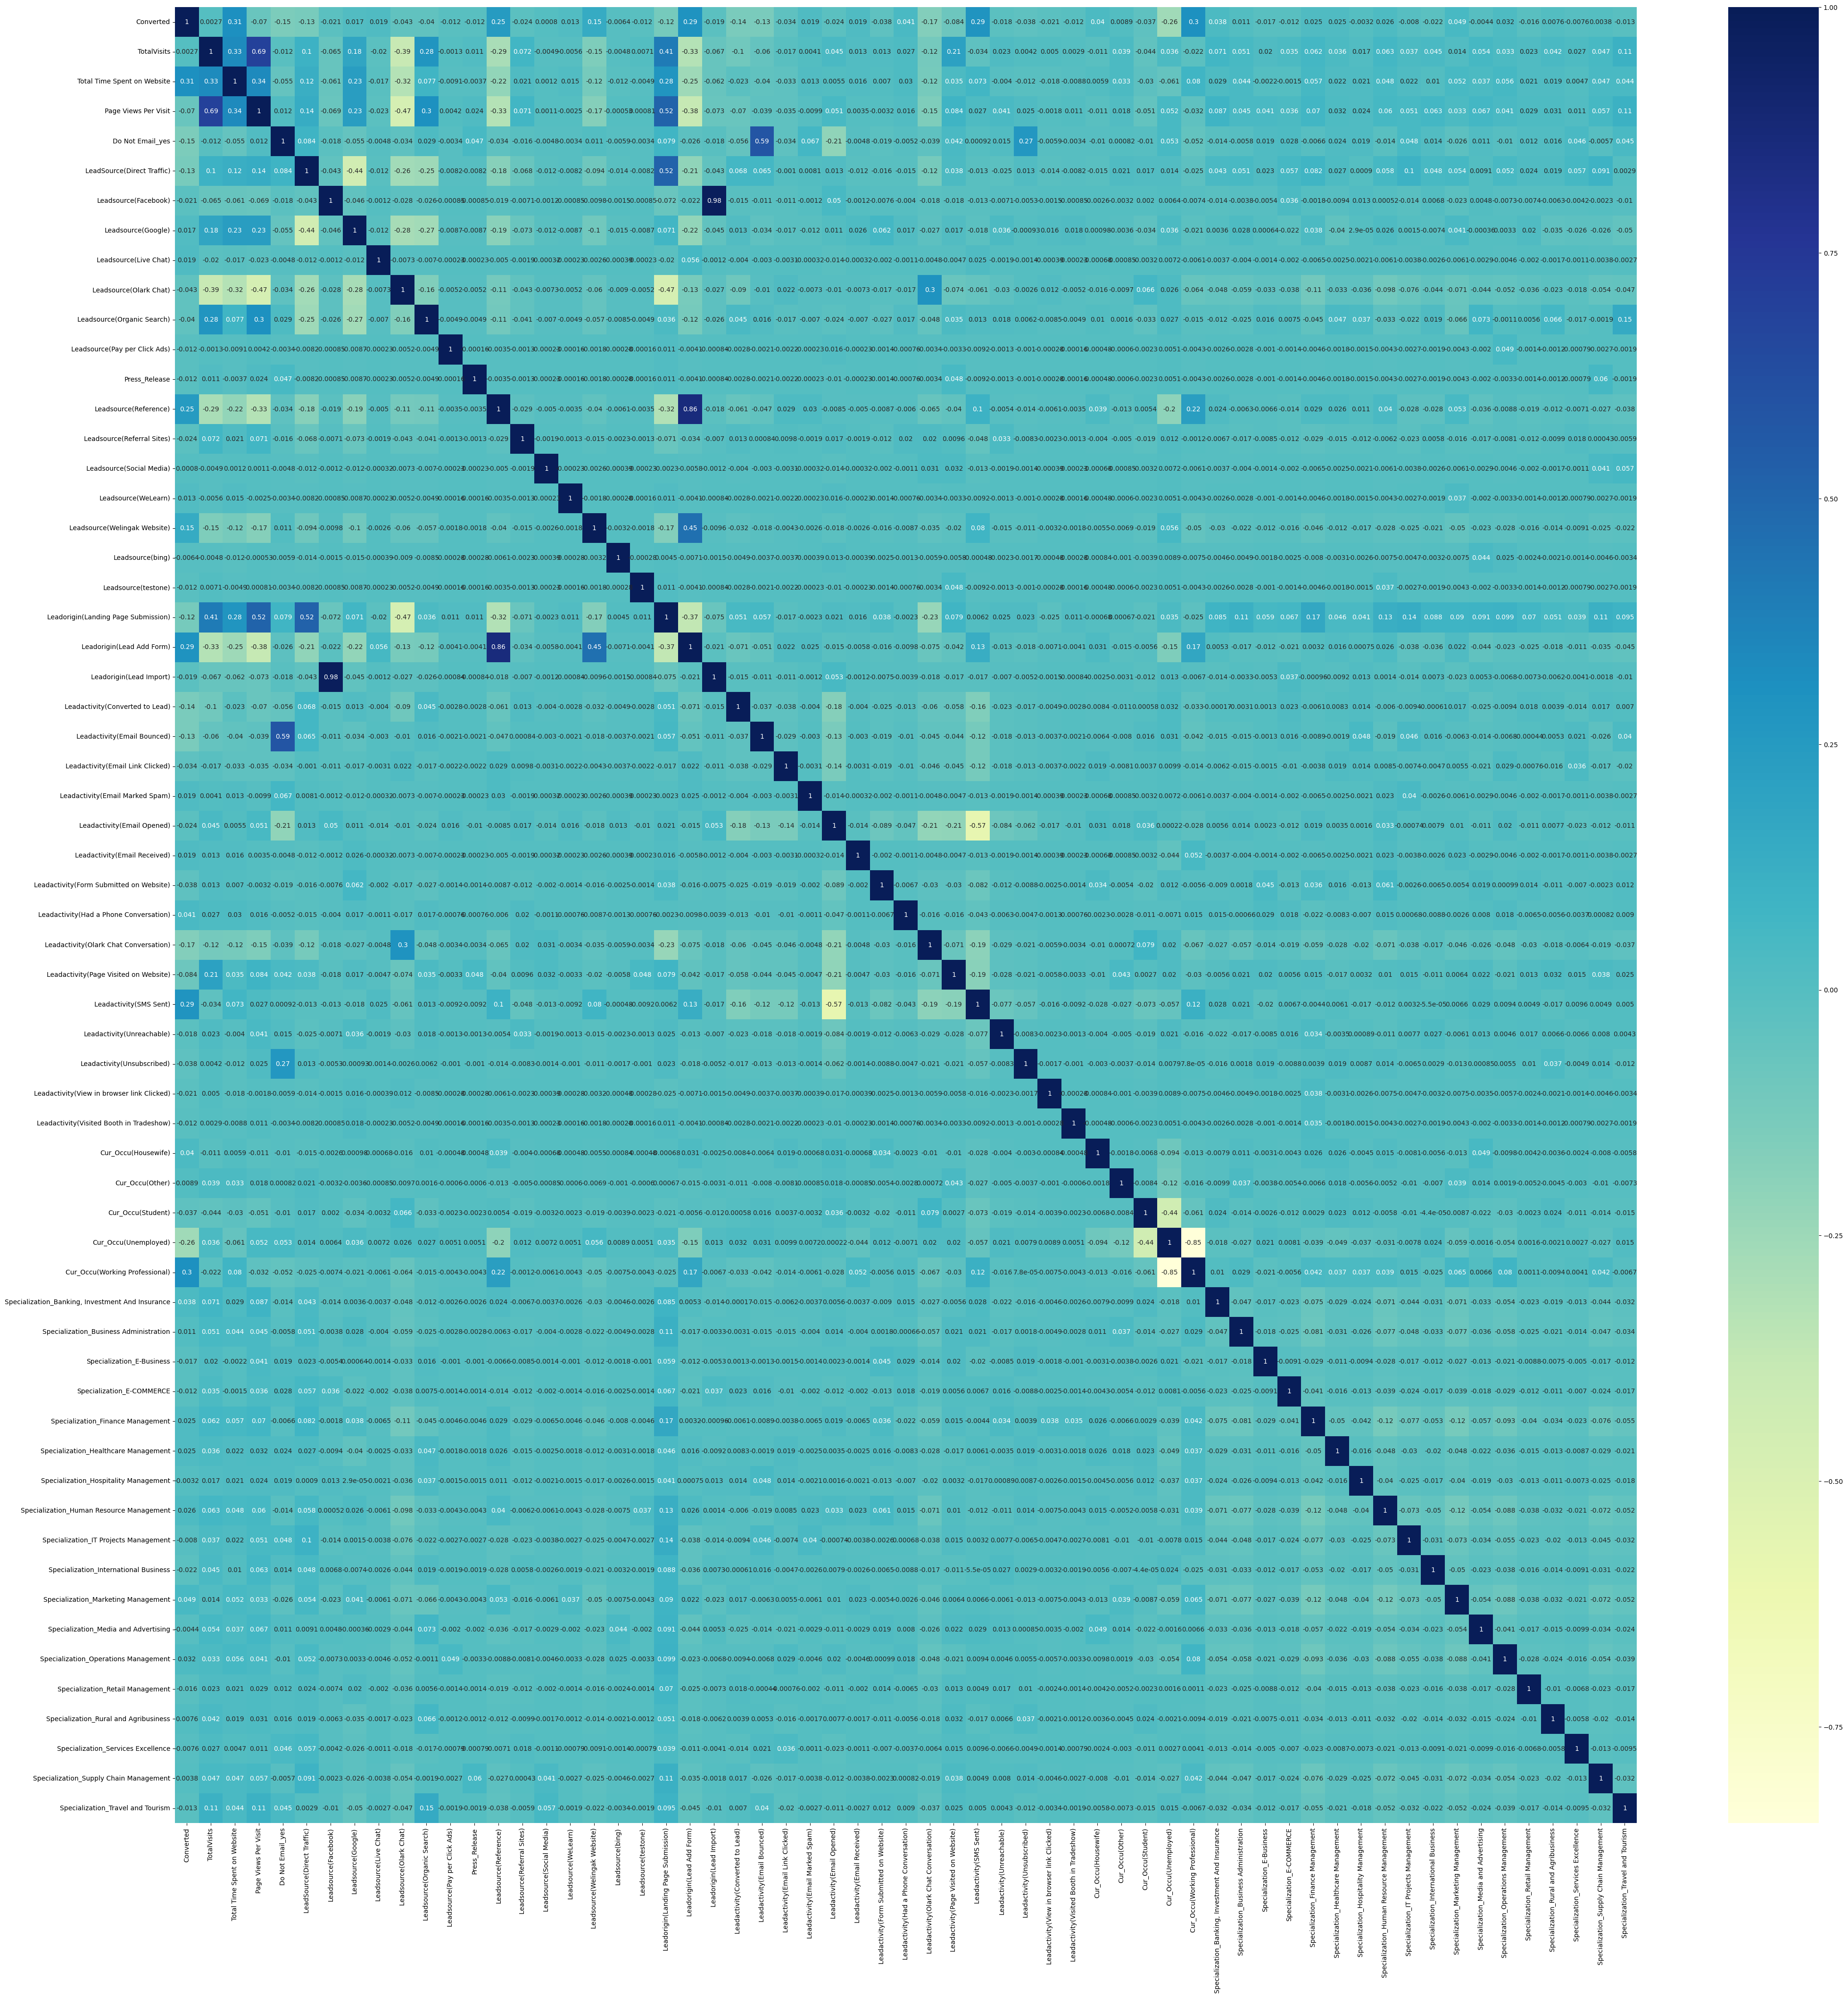

In [445]:
## Visualising the Correlations
plt.figure(figsize=(50,50))
sns.heatmap(lead_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [446]:
lead_df.corr()

Converted  TotalVisits  \
Converted                                1.000000     0.002691   
TotalVisits                              0.002691     1.000000   
Total Time Spent on Website              0.310370     0.334885   
Page Views Per Visit                    -0.070482     0.694597   
Do Not Email_yes                        -0.147119    -0.011910   
...                                           ...          ...   
Specialization_Retail Management        -0.015910     0.023164   
Specialization_Rural and Agribusiness    0.007636     0.042323   
Specialization_Services Excellence      -0.007620     0.027279   
Specialization_Supply Chain Management   0.003807     0.047283   
Specialization_Travel and Tourism       -0.012605     0.105984   

                                        Total Time Spent on Website  \
Converted                                                  0.310370   
TotalVisits                                                0.334885   
Total Time Spent on Website                                1.000000   
Page Views Per Visit                                       0.340350   
Do Not Email_yes                                          -0.055219   
...                                                             ...   
Specialization_Retail Management                           0.020980   
Specialization_Rural and Agribusiness                      0.018695   
Specialization_Services Excellence                         0.004660   
Specialization_Supply Chain Management                     0.046525   
Specialization_Travel and Tourism                          0.044018   

                                        Page Views Per Visit  \
Converted                                          -0.070482   
TotalVisits                                         0.694597   
Total Time Spent on Website                         0.340350   
Page Views Per Visit                                1.000000   
Do Not Email_yes                                    0.011757   
...                                                      ...   
Specialization_Retail Management                    0.028781   
Specialization_Rural and Agribusiness               0.030657   
Specialization_Services Excellence                  0.011064   
Specialization_Supply Chain Management              0.057479   
Specialization_Travel and Tourism                   0.109364   

                                        Do Not Email_yes  \
Converted                                      -0.147119   
TotalVisits                                    -0.011910   
Total Time Spent on Website                    -0.055219   
Page Views Per Visit                            0.011757   
Do Not Email_yes                                1.000000   
...                                                  ...   
Specialization_Retail Management                0.012052   
Specialization_Rural and Agribusiness           0.016459   
Specialization_Services Excellence              0.045511   
Specialization_Supply Chain Management         -0.005695   
Specialization_Travel and Tourism               0.045056   

                                        LeadSource(Direct Traffic)  \
Converted                                                -0.132204   
TotalVisits                                               0.104602   
Total Time Spent on Website                               0.119964   
Page Views Per Visit                                      0.136279   
Do Not Email_yes                                          0.083802   
...                                                            ...   
Specialization_Retail Management                          0.023564   
Specialization_Rural and Agribusiness                     0.019479   
Specialization_Services Excellence                        0.056617   
Specialization_Supply Chain Management                    0.091017   
Specialization_Travel and Tourism                         0.002923   

                                        Leadsource(Facebook)  \

### Statsmodel for Model Building

In [447]:
## Impoting StatsModel 
import statsmodels.api as sm 

In [448]:
## Fitting the model for the Trianed Data
logm1 = sm.GLM(y_train,sm.add_constant(X_train), family= sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4290
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1903.4
Date:                Sun, 04 Aug 2024   Deviance:                       3806.8
Time:                        11:35:39   Pearson chi2:                 4.53e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               48.1743   1.49e+05      0.000      1.000   -2.93e+05    2.93e+05
TotalVisits                                          1.3466      0.350      3.846      0.000       0.660       2.033
Total Time Spent on Website                          3.7571      0.165     22.779      0.000       3.434       4.080
Page Views Per Visit                                -1.0121      0.310     -3.269      0.001      -1.619      -0.405
Do Not Email_yes                                    -1.3495      0.251     -5.380      0.000      -1.841      -0.858
LeadSource(Direct Traffic)                         -26.4128   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(Facebook)                               -49.5719   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Leadsource(Google)                                 -25.9624   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(Live Chat)                               24.3441   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Leadsource(Olark Chat)                             -24.7141   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(Organic Search)                         -26.1915   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(Pay per Click Ads)                     1.579e-08   4.87e-05      0.000      1.000   -9.55e-05    9.55e-05
Press_Release                                      -47.2617   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Leadsource(Reference)                                2.0786      1.385      1.501      0.133      -0.636       4.794
Leadsource(Referral Sites)                         -26.3424   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(Social Media)                           -24.4455   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(WeLearn)                               1.246e-08   3.13e-05      0.000      1.000   -6.14e-05    6.14e-05
Leadsource(Welingak Website)                        24.9405   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
Leadsource(bing)                                   -25.5084   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadsource(testone)                                -48.7899   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Leadorigin(Landing Page Submission)                 -0.7508      0.155     -4.852      0.000      -1.054      -0.448
Leadorigin(Lead Add Form)                          -24.9038   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Leadorigin(Lead Import)                             24.0710   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Leadactivity(Converted to Lead)          

## Feature Selection

In [449]:
## Importing Logistic Regression For Feature Selection
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### Model:1

In [450]:
## Importing the RFE for Feature Selection and selcting Top 15 Features
from sklearn.feature_selection import RFE
rfe = RFE(estimator=log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [451]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [452]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Do Not Email_yes', True, 1),
 ('LeadSource(Direct Traffic)', False, 7),
 ('Leadsource(Facebook)', False, 33),
 ('Leadsource(Google)', False, 10),
 ('Leadsource(Live Chat)', False, 39),
 ('Leadsource(Olark Chat)', True, 1),
 ('Leadsource(Organic Search)', False, 9),
 ('Leadsource(Pay per Click Ads)', False, 46),
 ('Press_Release', False, 42),
 ('Leadsource(Reference)', True, 1),
 ('Leadsource(Referral Sites)', False, 8),
 ('Leadsource(Social Media)', False, 29),
 ('Leadsource(WeLearn)', False, 44),
 ('Leadsource(Welingak Website)', True, 1),
 ('Leadsource(bing)', False, 41),
 ('Leadsource(testone)', False, 32),
 ('Leadorigin(Landing Page Submission)', False, 23),
 ('Leadorigin(Lead Add Form)', True, 1),
 ('Leadorigin(Lead Import)', False, 36),
 ('Leadactivity(Converted to Lead)', True, 1),
 ('Leadactivity(Email Bounced)', False, 3),
 ('Leadactivity(Email Link Clicked)', False, 1

In [453]:
col = X_train.columns[rfe.support_]

In [454]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Do Not Email_yes',
       'Leadsource(Olark Chat)', 'Leadsource(Reference)',
       'Leadsource(Welingak Website)', 'Leadorigin(Lead Add Form)',
       'Leadactivity(Converted to Lead)',
       'Leadactivity(Had a Phone Conversation)',
       'Leadactivity(Olark Chat Conversation)', 'Leadactivity(SMS Sent)',
       'Cur_Occu(Housewife)', 'Cur_Occu(Student)', 'Cur_Occu(Unemployed)',
       'Cur_Occu(Working Professional)'],
      dtype='object')

### Model:2

In [455]:
## Building the model for top 15 Features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4332
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1974.9
Date:                Sun, 04 Aug 2024   Deviance:                       3949.9
Time:                        11:35:40   Pearson chi2:                 4.47e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3787
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3559      0.679     -1.997      0.046      -2.686      -0.025
TotalVisits                                0.7606      0.285      2.667      0.008       0.202       1.320
Total Time Spent on Website                3.7558      0.160     23.487      0.000       3.442       4.069
Do Not Email_yes                          -1.6082      0.197     -8.154      0.000      -1.995      -1.222
Leadsource(Olark Chat)                     1.6604      0.136     12.252      0.000       1.395       1.926
Leadsource(Reference)                      2.3088      1.046      2.207      0.027       0.259       4.359
Leadsource(Welingak Website)              24.6377   1.38e+04      0.002      0.999   -2.69e+04     2.7e+04
Leadorigin(Lead Add Form)                  1.6321      1.021      1.599      0.110      -0.369       3.633
Leadactivity(Converted to Lead)           -1.0193      0.239     -4.267      0.000      -1.488      -0.551
Leadactivity(Had a Phone Conversation)     2.6917      0.900      2.991      0.003       0.928       4.456
Leadactivity(Olark Chat Conversation)     -1.2768      0.192     -6.665      0.000      -1.652      -0.901
Leadactivity(SMS Sent)                     1.1409      0.086     13.299      0.000       0.973       1.309
Cur_Occu(Housewife)                       23.9696   4.03e+04      0.001      1.000    -7.9e+04    7.91e+04
Cur_Occu(Student)                         -0.8615      0.704     -1.225      0.221      -2.240       0.517
Cur_Occu(Unemployed)                      -0.8672      0.669     -1.297      0.195      -2.178       0.443
Cur_Occu(Working Professional)             1.6808      0.693      2.424      0.015       0.322       3.040
==========================================================================================================
"""

In [456]:
X_train[col]

TotalVisits  Total Time Spent on Website  Do Not Email_yes  \
8560     0.111111                     0.246345                 0   
2647     0.000000                     0.000000                 0   
1190     0.222222                     0.877639                 0   
7830     0.166667                     0.233893                 0   
7294     0.055556                     0.012994                 0   
...           ...                          ...               ...   
8963     0.166667                     0.145100                 0   
103      0.111111                     0.345425                 0   
6031     0.388889                     0.712507                 1   
8868     0.000000                     0.000000                 0   
8433     0.166667                     0.713590                 0   

      Leadsource(Olark Chat)  Leadsource(Reference)  \
8560                       0                      0   
2647                       1                      0   
1190                       0                      0   
7830                       0                      0   
7294                       0                      0   
...                      ...                    ...   
8963                       0                      0   
103                        0                      0   
6031                       0                      0   
8868                       1                      0   
8433                       0                      0   

      Leadsource(Welingak Website)  Leadorigin(Lead Add Form)  \
8560                             0                          0   
2647                             0                          0   
1190                             0                          0   
7830                             0                          0   
7294                             0                          0   
...                            ...                        ...   
8963                             0                          0   
103                              0                          0   
6031                             0                          0   
8868                             0                          0   
8433                             0                          0   

      Leadactivity(Converted to Lead)  Leadactivity(Had a Phone Conversation)  \
8560                                0                                       0   
2647                                0                                       0   
1190                                0                                       0   
7830                                0                                       0   
7294                                1                                       0   
...                               ...                                     ...   
8963                                0                                       0   
103                                 0                                       0   
6031                                0                                       0   
8868                                0                                       0   
8433                                0                                       0   

      Leadactivity(Olark Chat Conversation)  Leadactivity(SMS Sent)  \
8560                                      0                       0   
2647                                      1                       0   
1190                                      0                       1   
7830                                      0                       0   
7294                                      0                       0   
...                                     ...                     ...   
8963                                      0                       0   
103                                       0                       0   
6031                                      0                       0   
8868                                      1                     

#### Checking Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in a set of predictor variables in a regression model. Multicollinearity occurs when two or more predictors are highly correlated, which can inflate the variances of the parameter estimates and make the model coefficients unstable and difficult to interpret.

In [457]:
## Checking the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =  vif.sort_values(by='VIF',ascending=False)
vif

features    VIF
6                Leadorigin(Lead Add Form)  79.39
4                    Leadsource(Reference)  63.73
5             Leadsource(Welingak Website)  16.86
13                    Cur_Occu(Unemployed)   5.89
0                              TotalVisits   3.27
1              Total Time Spent on Website   2.43
14          Cur_Occu(Working Professional)   1.85
3                   Leadsource(Olark Chat)   1.79
10                  Leadactivity(SMS Sent)   1.69
9    Leadactivity(Olark Chat Conversation)   1.23
12                       Cur_Occu(Student)   1.17
7          Leadactivity(Converted to Lead)   1.16
2                         Do Not Email_yes   1.10
8   Leadactivity(Had a Phone Conversation)   1.01
11                     Cur_Occu(Housewife)   1.01

A high p-value for a feature indicates that the feature is not statistically significant in predicting the outcome variable
If a feature consistently shows a high p-value across different samples or models, it might be a good candidate for removal. Including non-significant features can add noise to the model and reduce its interpretability.

We seen that Leadsource(Welingak Website) feature had an high p-value and high VIF. We need drop this Leadsource(Welingak Website) feature

In [458]:
## Droping the column
col = col.drop('Leadsource(Welingak Website)',1)
col.shape

(14,)

## Model 3

In [459]:
## Building the model for top 15 Features
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4333
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.8
Date:                Sun, 04 Aug 2024   Deviance:                       3963.7
Time:                        11:35:40   Pearson chi2:                 4.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3768
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3520      0.679     -1.992      0.046      -2.683      -0.021
TotalVisits                                0.7519      0.286      2.632      0.008       0.192       1.312
Total Time Spent on Website                3.7526      0.160     23.470      0.000       3.439       4.066
Do Not Email_yes                          -1.5938      0.196     -8.149      0.000      -1.977      -1.210
Leadsource(Olark Chat)                     1.6540      0.136     12.192      0.000       1.388       1.920
Leadsource(Reference)                     -1.5729      0.761     -2.066      0.039      -3.065      -0.081
Leadorigin(Lead Add Form)                  5.5100      0.731      7.537      0.000       4.077       6.943
Leadactivity(Converted to Lead)           -1.0193      0.239     -4.267      0.000      -1.487      -0.551
Leadactivity(Had a Phone Conversation)     2.6904      0.899      2.993      0.003       0.928       4.452
Leadactivity(Olark Chat Conversation)     -1.2699      0.191     -6.648      0.000      -1.644      -0.896
Leadactivity(SMS Sent)                     1.1431      0.086     13.340      0.000       0.975       1.311
Cur_Occu(Housewife)                       21.9683   1.48e+04      0.001      0.999   -2.91e+04    2.91e+04
Cur_Occu(Student)                         -0.8620      0.703     -1.225      0.220      -2.241       0.517
Cur_Occu(Unemployed)                      -0.8689      0.669     -1.300      0.194      -2.179       0.441
Cur_Occu(Working Professional)             1.6785      0.693      2.421      0.015       0.319       3.037
==========================================================================================================
"""

In [460]:
## Checking the VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =  vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
12                    Cur_Occu(Unemployed)  5.89
5                Leadorigin(Lead Add Form)  5.17
4                    Leadsource(Reference)  4.84
0                              TotalVisits  3.26
1              Total Time Spent on Website  2.43
13          Cur_Occu(Working Professional)  1.85
3                   Leadsource(Olark Chat)  1.79
9                   Leadactivity(SMS Sent)  1.69
8    Leadactivity(Olark Chat Conversation)  1.23
11                       Cur_Occu(Student)  1.17
6          Leadactivity(Converted to Lead)  1.16
2                         Do Not Email_yes  1.10
7   Leadactivity(Had a Phone Conversation)  1.01
10                     Cur_Occu(Housewife)  1.01

We seen that Cur_Occu(Unemployed) feature had an high p-value and high VIF.We need drop this Cur_Occu(Unemployed) feature

In [461]:
## Droping the column
col = col.drop('Cur_Occu(Unemployed)',1)
col.shape

(13,)

### Model 4:

In [462]:
## Building the model for top 15 Features
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4334
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1982.7
Date:                Sun, 04 Aug 2024   Deviance:                       3965.4
Time:                        11:35:40   Pearson chi2:                 4.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2226      0.110    -20.143      0.000      -2.439      -2.006
TotalVisits                                0.7780      0.285      2.728      0.006       0.219       1.337
Total Time Spent on Website                3.7534      0.160     23.485      0.000       3.440       4.067
Do Not Email_yes                          -1.5959      0.196     -8.162      0.000      -1.979      -1.213
Leadsource(Olark Chat)                     1.6563      0.136     12.207      0.000       1.390       1.922
Leadsource(Reference)                     -1.5725      0.761     -2.066      0.039      -3.064      -0.081
Leadorigin(Lead Add Form)                  5.5127      0.731      7.541      0.000       4.080       6.946
Leadactivity(Converted to Lead)           -1.0203      0.239     -4.272      0.000      -1.488      -0.552
Leadactivity(Had a Phone Conversation)     2.6844      0.899      2.985      0.003       0.922       4.447
Leadactivity(Olark Chat Conversation)     -1.2617      0.191     -6.616      0.000      -1.635      -0.888
Leadactivity(SMS Sent)                     1.1399      0.086     13.311      0.000       0.972       1.308
Cur_Occu(Housewife)                       22.8344   1.48e+04      0.002      0.999   -2.91e+04    2.91e+04
Cur_Occu(Student)                          0.0033      0.227      0.014      0.989      -0.442       0.449
Cur_Occu(Working Professional)             2.5443      0.193     13.217      0.000       2.167       2.922
==========================================================================================================
"""

In [463]:
## Checking the VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =  vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
4                    Leadsource(Reference)  4.84
5                Leadorigin(Lead Add Form)  4.83
1              Total Time Spent on Website  1.99
0                              TotalVisits  1.92
9                   Leadactivity(SMS Sent)  1.52
3                   Leadsource(Olark Chat)  1.24
12          Cur_Occu(Working Professional)  1.22
8    Leadactivity(Olark Chat Conversation)  1.20
2                         Do Not Email_yes  1.05
11                       Cur_Occu(Student)  1.04
6          Leadactivity(Converted to Lead)  1.02
7   Leadactivity(Had a Phone Conversation)  1.01
10                     Cur_Occu(Housewife)  1.01

We seen that Leadsource(Reference)  feature had an high p-value and high VIF.We need drop this Leadsource(Welingak Website) feature

In [464]:
## Droping the column
col = col.drop('Leadsource(Reference)',1)
col.shape

(12,)

### Model 5

In [465]:
## Building the model for top 15 Features
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4335
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.8
Date:                Sun, 04 Aug 2024   Deviance:                       3971.5
Time:                        11:35:41   Pearson chi2:                 4.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2240      0.110    -20.162      0.000      -2.440      -2.008
TotalVisits                                0.7792      0.285      2.733      0.006       0.220       1.338
Total Time Spent on Website                3.7532      0.160     23.490      0.000       3.440       4.066
Do Not Email_yes                          -1.5807      0.194     -8.148      0.000      -1.961      -1.200
Leadsource(Olark Chat)                     1.6560      0.136     12.211      0.000       1.390       1.922
Leadorigin(Lead Add Form)                  4.2177      0.243     17.384      0.000       3.742       4.693
Leadactivity(Converted to Lead)           -1.0174      0.239     -4.261      0.000      -1.485      -0.549
Leadactivity(Had a Phone Conversation)     2.6830      0.898      2.986      0.003       0.922       4.444
Leadactivity(Olark Chat Conversation)     -1.2525      0.190     -6.593      0.000      -1.625      -0.880
Leadactivity(SMS Sent)                     1.1426      0.086     13.353      0.000       0.975       1.310
Cur_Occu(Housewife)                       22.8011   1.47e+04      0.002      0.999   -2.87e+04    2.87e+04
Cur_Occu(Student)                         -0.0112      0.229     -0.049      0.961      -0.459       0.437
Cur_Occu(Working Professional)             2.5354      0.193     13.155      0.000       2.158       2.913
==========================================================================================================
"""

In [466]:
## Checking the VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =  vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
1              Total Time Spent on Website  1.99
0                              TotalVisits  1.92
8                   Leadactivity(SMS Sent)  1.52
3                   Leadsource(Olark Chat)  1.24
7    Leadactivity(Olark Chat Conversation)  1.20
11          Cur_Occu(Working Professional)  1.19
4                Leadorigin(Lead Add Form)  1.17
2                         Do Not Email_yes  1.05
10                       Cur_Occu(Student)  1.04
5          Leadactivity(Converted to Lead)  1.02
6   Leadactivity(Had a Phone Conversation)  1.01
9                      Cur_Occu(Housewife)  1.01

We seen that Cur_Occu(Student) feature had an high p-value. We need drop this Cur_Occu(Student) feature

In [467]:
## Droping the column
col = col.drop('Cur_Occu(Student)',1)
col.shape

(11,)

### Model 6

In [468]:
## Building the model for top 15 Features
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4336
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1985.8
Date:                Sun, 04 Aug 2024   Deviance:                       3971.5
Time:                        11:35:41   Pearson chi2:                 4.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2244      0.110    -20.243      0.000      -2.440      -2.009
TotalVisits                                0.7795      0.285      2.735      0.006       0.221       1.338
Total Time Spent on Website                3.7532      0.160     23.490      0.000       3.440       4.066
Do Not Email_yes                          -1.5806      0.194     -8.148      0.000      -1.961      -1.200
Leadsource(Olark Chat)                     1.6558      0.136     12.215      0.000       1.390       1.921
Leadorigin(Lead Add Form)                  4.2175      0.243     17.386      0.000       3.742       4.693
Leadactivity(Converted to Lead)           -1.0174      0.239     -4.261      0.000      -1.485      -0.549
Leadactivity(Had a Phone Conversation)     2.6833      0.898      2.987      0.003       0.923       4.444
Leadactivity(Olark Chat Conversation)     -1.2528      0.190     -6.599      0.000      -1.625      -0.881
Leadactivity(SMS Sent)                     1.1428      0.085     13.386      0.000       0.976       1.310
Cur_Occu(Housewife)                       22.8016   1.47e+04      0.002      0.999   -2.87e+04    2.87e+04
Cur_Occu(Working Professional)             2.5358      0.193     13.166      0.000       2.158       2.913
==========================================================================================================
"""

In [469]:
## Checking the VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =  vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
1              Total Time Spent on Website  1.99
0                              TotalVisits  1.92
8                   Leadactivity(SMS Sent)  1.52
3                   Leadsource(Olark Chat)  1.23
7    Leadactivity(Olark Chat Conversation)  1.19
10          Cur_Occu(Working Professional)  1.19
4                Leadorigin(Lead Add Form)  1.17
2                         Do Not Email_yes  1.05
5          Leadactivity(Converted to Lead)  1.02
6   Leadactivity(Had a Phone Conversation)  1.01
9                      Cur_Occu(Housewife)  1.01

We seen that Cur_Occu(Housewife) feature had an high p-value. We need drop this Cur_Occu(Housewife) feature

In [470]:
## Droping the column
col = col.drop('Cur_Occu(Housewife)',1)
col.shape

(10,)

### Model 7

In [471]:
## Building the model for top 15 Features
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial()).fit()
logm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4348
Model:                            GLM   Df Residuals:                     4337
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1991.6
Date:                Sun, 04 Aug 2024   Deviance:                       3983.2
Time:                        11:35:41   Pearson chi2:                 4.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2076      0.110    -20.161      0.000      -2.422      -1.993
TotalVisits                                0.7590      0.285      2.667      0.008       0.201       1.317
Total Time Spent on Website                3.7499      0.160     23.496      0.000       3.437       4.063
Do Not Email_yes                          -1.5860      0.194     -8.180      0.000      -1.966      -1.206
Leadsource(Olark Chat)                     1.6440      0.135     12.150      0.000       1.379       1.909
Leadorigin(Lead Add Form)                  4.2212      0.242     17.423      0.000       3.746       4.696
Leadactivity(Converted to Lead)           -1.0298      0.239     -4.316      0.000      -1.497      -0.562
Leadactivity(Had a Phone Conversation)     2.6744      0.898      2.977      0.003       0.914       4.435
Leadactivity(Olark Chat Conversation)     -1.2593      0.190     -6.636      0.000      -1.631      -0.887
Leadactivity(SMS Sent)                     1.1330      0.085     13.289      0.000       0.966       1.300
Cur_Occu(Working Professional)             2.5292      0.193     13.136      0.000       2.152       2.907
==========================================================================================================
"""

In [472]:
## Checking the VIFs
vif = pd.DataFrame()
vif['features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values ,i ) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif =  vif.sort_values(by='VIF',ascending=False)
vif

features   VIF
1             Total Time Spent on Website  1.98
0                             TotalVisits  1.92
8                  Leadactivity(SMS Sent)  1.52
3                  Leadsource(Olark Chat)  1.23
7   Leadactivity(Olark Chat Conversation)  1.19
9          Cur_Occu(Working Professional)  1.19
4               Leadorigin(Lead Add Form)  1.16
2                        Do Not Email_yes  1.05
5         Leadactivity(Converted to Lead)  1.02
6  Leadactivity(Had a Phone Conversation)  1.01

In [473]:
X_train[col].columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Do Not Email_yes',
       'Leadsource(Olark Chat)', 'Leadorigin(Lead Add Form)',
       'Leadactivity(Converted to Lead)',
       'Leadactivity(Had a Phone Conversation)',
       'Leadactivity(Olark Chat Conversation)', 'Leadactivity(SMS Sent)',
       'Cur_Occu(Working Professional)'],
      dtype='object')

In [474]:
list(zip(X_train[col],rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Do Not Email_yes', False, 2),
 ('Leadsource(Olark Chat)', True, 1),
 ('Leadorigin(Lead Add Form)', False, 7),
 ('Leadactivity(Converted to Lead)', False, 33),
 ('Leadactivity(Had a Phone Conversation)', False, 10),
 ('Leadactivity(Olark Chat Conversation)', False, 39),
 ('Leadactivity(SMS Sent)', True, 1),
 ('Cur_Occu(Working Professional)', False, 9)]

In [475]:
top_features = pd.DataFrame(X_train[col])
top_features.head()


TotalVisits  Total Time Spent on Website  Do Not Email_yes  \
8560     0.111111                     0.246345                 0   
2647     0.000000                     0.000000                 0   
1190     0.222222                     0.877639                 0   
7830     0.166667                     0.233893                 0   
7294     0.055556                     0.012994                 0   

      Leadsource(Olark Chat)  Leadorigin(Lead Add Form)  \
8560                       0                          0   
2647                       1                          0   
1190                       0                          0   
7830                       0                          0   
7294                       0                          0   

      Leadactivity(Converted to Lead)  Leadactivity(Had a Phone Conversation)  \
8560                                0                                       0   
2647                                0                                       0   
1190                                0                                       0   
7830                                0                                       0   
7294                                1                                       0   

      Leadactivity(Olark Chat Conversation)  Leadactivity(SMS Sent)  \
8560                                      0                       0   
2647                                      1                       0   
1190                                      0                       1   
7830                                      0                       0   
7294                                      0                       0   

      Cur_Occu(Working Professional)  
8560                               0  
2647                               0  
1190                               0  
7830                               0  
7294                               0

### These are Top 10 Features

In [476]:
## Predicting the Probabilities of Target
y_trian_predict = logm7.predict(X_train_sm)
y_trian_predict.head()

8560    0.231558
2647    0.139079
1190    0.915685
7830    0.230753
7294    0.041228
dtype: float64

In [477]:
## Reshaping it to form DataFrame
y_trian_predict = y_trian_predict.values.reshape(-1)
y_trian_predict

array([0.23155767, 0.13907863, 0.91568455, ..., 0.30436423, 0.13907863,
       0.84912691])

In [478]:
## Creating DF
y_trian_predict_final = pd.DataFrame({'Converted' : y_train.values ,'Lead_Prob': y_trian_predict})
y_trian_predict_final.head()

Converted  Lead_Prob
0          0   0.231558
1          0   0.139079
2          1   0.915685
3          0   0.230753
4          0   0.041228

In [479]:
## Deciding the Conversion based on Threshold
y_trian_predict_final['Predicted'] = y_trian_predict_final['Lead_Prob'].apply(lambda x : 0 if x < 0.5 else 1)
y_trian_predict_final.head()

Converted  Lead_Prob  Predicted
0          0   0.231558          0
1          0   0.139079          0
2          1   0.915685          1
3          0   0.230753          0
4          0   0.041228          0

# Step 6 : Evaluation Metrics

In [480]:
## importing the metrics
from sklearn import metrics

In [481]:
## Checking the accuracy of Model
metrics.accuracy_score(y_trian_predict_final['Converted'],y_trian_predict_final['Predicted'])

0.7893284268629255

In [482]:
## Confusion Matrix
confusion_matrix1 = metrics.confusion_matrix(y_trian_predict_final['Converted'],y_trian_predict_final['Predicted'])
confusion_matrix1

array([[1894,  374],
       [ 542, 1538]], dtype=int64)

### Hence these are Model Predicted Features

## Metrics beyond accuracy

In [483]:
TP = confusion_matrix1[1,1]
TN = confusion_matrix1[0,0]
FP = confusion_matrix1[0,1]
FN = confusion_matrix1[1,0]

In [484]:
# sensivity
TP / float(TP+FN)

0.739423076923077

In [485]:
# specificity
TN / float(TN+FP)

0.8350970017636684

In [486]:
### False Positive Rate - predicting conversion but not converted
print(FP /float(TN+FP) )

0.16490299823633156


In [487]:
#  positive Predicted value
print(TP / float(TP+FP))

0.8043933054393305


In [488]:
# Negative Predicted value
print(TN / float(TN+FN))

0.777504105090312


## Plotting the ROC Curve

In [489]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [490]:
fpr, tpr, thresholds = metrics.roc_curve(y_trian_predict_final['Converted'],y_trian_predict_final['Lead_Prob'])

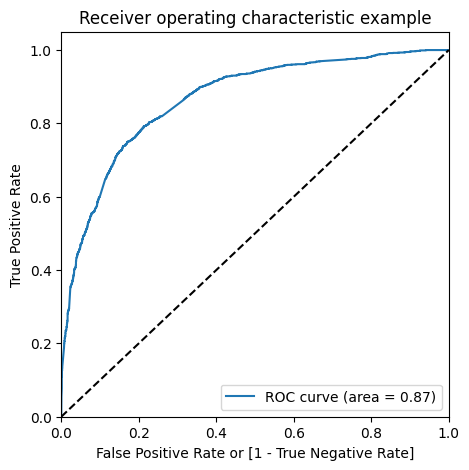

In [491]:
draw_roc(y_trian_predict_final['Converted'],y_trian_predict_final['Lead_Prob'])

#### Area Under Curve : 0.87
ROC curve is more towards the upper-left corner of the graph, it means that the model is very good

### Finding Threshold

Threshold for Correct Cutoff

In [492]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_trian_predict_final[i] = y_trian_predict_final.Lead_Prob.map(lambda x : 1 if x > i else 0)

y_trian_predict_final.head()

Converted  Lead_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0   0.231558          0    1    1    1    0    0    0    0    0   
1          0   0.139079          0    1    1    0    0    0    0    0    0   
2          1   0.915685          1    1    1    1    1    1    1    1    1   
3          0   0.230753          0    1    1    1    0    0    0    0    0   
4          0   0.041228          0    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    1    1  
3    0    0  
4    0    0

In [493]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_trian_predict_final['Converted'],y_trian_predict_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.478381  1.000000  0.000000
0.1   0.1  0.557268  0.989904  0.160494
0.2   0.2  0.714121  0.937019  0.509700
0.3   0.3  0.761040  0.901442  0.632275
0.4   0.4  0.787029  0.803365  0.772046
0.5   0.5  0.789328  0.739423  0.835097
0.6   0.6  0.779669  0.679327  0.871693
0.7   0.7  0.744940  0.551442  0.922399
0.8   0.8  0.715501  0.456731  0.952822
0.9   0.9  0.640524  0.266346  0.983686


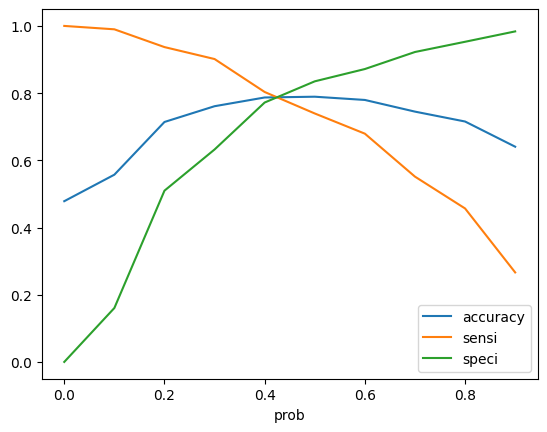

In [494]:
cutoff_df.plot.line(x = 'prob',y=['accuracy','sensi','speci'])
plt.show()

From the above curve,0.45 is the optimal point to tkae is TradeOff Threshold

### Precision and Recall

In [495]:
confusion_matrix1

array([[1894,  374],
       [ 542, 1538]], dtype=int64)

Using sklearn metrics

In [496]:
## Importing Another Metrics
from sklearn.metrics import precision_score,recall_score

In [497]:
## Precision Score
precision_score(y_trian_predict_final['Converted'],y_trian_predict_final['Predicted'])

0.8043933054393305

Precision Recall Tradeoff

In [498]:
from sklearn.metrics import precision_recall_curve

In [499]:
## Thresholds
p , r ,thresholds = precision_recall_curve(y_trian_predict_final['Converted'],y_trian_predict_final['Lead_Prob'])

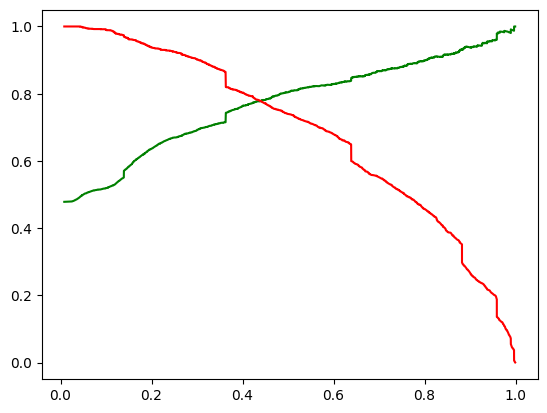

In [500]:
## Plotting Threshold
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

### As we perform Sensitivity-Specific-Accuracy Metrics and Precision and Recall Metrics we find an 0.45 is cut-off Threshold

# Step 7 : Model Evaluation

### Scaling Variables

In [501]:
## Transforming the Variables
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = sc.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8560     0.111111                     0.246345              0.111111   
2647     0.000000                     0.000000              0.000000   
1190     0.222222                     0.877639              0.444444   
7830     0.166667                     0.233893              0.166667   
7294     0.055556                     0.012994              0.111111   

      Do Not Email_yes  LeadSource(Direct Traffic)  Leadsource(Facebook)  \
8560                 0                           0                     0   
2647                 0                           0                     0   
1190                 0                           0                     0   
7830                 0                           1                     0   
7294                 0                           1                     0   

      Leadsource(Google)  Leadsource(Live Chat)  Leadsource(Olark Chat)  \
8560                   1                      0                       0   
2647                   0                      0                       1   
1190                   1                      0                       0   
7830                   0                      0                       0   
7294                   0                      0                       0   

      Leadsource(Organic Search)  ...  Specialization_IT Projects Management  \
8560                           0  ...                                      0   
2647                           0  ...                                      0   
1190                           0  ...                                      0   
7830                           0  ...                                      0   
7294                           0  ...                                      0   

      Specialization_International Business  \
8560                                      0   
2647                                      0   
1190                                      0   
7830                                      0   
7294                                      0   

      Specialization_Marketing Management  \
8560                                    0   
2647                                    0   
1190                                    0   
7830                                    0   
7294                                    0   

      Specialization_Media and Advertising  \
8560                                     0   
2647                                     0   
1190                                     0   
7830                                     0   
7294                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8560                                     0                                 0   
2647                                     0                                 0   
1190                                     0                                 0   
7830                                     0                                 0   
7294                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8560                                      0   
2647                                      0   
1190                                      0   
7830                                      0   
7294                                      0   

      Specialization_Services Excellence  \
8560                                   0   
2647                                   0   
1190                                   0   
7830                                   0   
7294                                   0   

      Specialization_Supply Chain Management  \
8560                                       0   
2647                                       0   
1190                                       0   
7830                                       0   
7294                                       1   

      Specialization_Travel and Tou

In [502]:
## Getting Test Data
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Do Not Email_yes  \
8226     0.166667                     0.697347                 0   
6112     0.166667                     0.395236                 0   
9006     0.166667                     0.129399                 0   
4492     0.055556                     0.107201                 0   
8038     0.333333                     0.390363                 0   

      Leadsource(Olark Chat)  Leadorigin(Lead Add Form)  \
8226                       0                          0   
6112                       0                          0   
9006                       0                          0   
4492                       1                          0   
8038                       0                          0   

      Leadactivity(Converted to Lead)  Leadactivity(Had a Phone Conversation)  \
8226                                0                                       0   
6112                                0                                       0   
9006                                0                                       0   
4492                                0                                       0   
8038                                0                                       0   

      Leadactivity(Olark Chat Conversation)  Leadactivity(SMS Sent)  \
8226                                      0                       0   
6112                                      0                       0   
9006                                      1                       0   
4492                                      1                       0   
8038                                      1                       0   

      Cur_Occu(Working Professional)  
8226                               0  
6112                               0  
9006                               0  
4492                               0  
8038                               0

In [503]:
X_test[col].shape

(1864, 10)

In [504]:
y_test.head()

8226    1
6112    1
9006    0
4492    0
8038    1
Name: Converted, dtype: int64

In [505]:
y_test.shape

(1864,)

In [506]:
### Adding Constant to Test Data
X_test_sm = sm.add_constant(X_test)

In [507]:
## Predict the Test data from Train Model
y_test_pred = logm7.predict(X_test_sm)

In [508]:
y_test_1 = pd.DataFrame(y_test_pred) 
y_test_1.head()


0
8226  0.630378
6112  0.354562
9006  0.054414
4492  0.201201
8038  0.148035

In [509]:
y_test_df = pd.DataFrame(y_test)

In [510]:
## Reseting the INdex
y_test_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [511]:
## Concating the DataFrames
y_test_final = pd.concat((y_test_1,y_test_df),axis=1)

In [512]:
## Rename the column
y_test_final = y_test_final.rename(columns={0:'Lead_prob'})

In [513]:
## Allocating the Converted Rate with Desired Threshold
y_test_final['Test_pred'] = y_test_final['Lead_prob'].apply(lambda x : 1 if x > 0.45 else 0)

In [514]:
y_test_final.head()

Lead_prob  Converted  Test_pred
0   0.630378          1          1
1   0.354562          1          0
2   0.054414          0          0
3   0.201201          0          0
4   0.148035          1          0

### Model Evaluation

In [515]:
## Accuracy Score
metrics.accuracy_score(y_test_final['Converted'],y_test_final['Test_pred'])

0.7923819742489271

In [516]:
## Confusion Matrix
confusion_matrix2 = metrics.confusion_matrix(y_test_final['Converted'],y_test_final['Test_pred'])
confusion_matrix2

array([[784, 192],
       [195, 693]], dtype=int64)

In [517]:
## Precision Score
metrics.precision_score(y_test_final['Converted'],y_test_final['Test_pred'])

0.7830508474576271

In [518]:
## Recall Score
metrics.recall_score(y_test_final['Converted'],y_test_final['Test_pred'])

0.7804054054054054

The precision score of 78% means that when the model predicts a positive instance, it is correct approximately 78% of the time.


The recall score (also known as sensitivity) of 78% indicates that the model captures approximately 78% of all actual positive instances.

The Model performs well on Test Data and predicting good results, So the model we build is Good.

In [519]:
lead_df[col].head()

TotalVisits  Total Time Spent on Website  Do Not Email_yes  \
0          0.0                            0                 0   
1          5.0                          674                 0   
2          2.0                         1532                 0   
3          1.0                          305                 0   
4          2.0                         1428                 0   

   Leadsource(Olark Chat)  Leadorigin(Lead Add Form)  \
0                       1                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   Leadactivity(Converted to Lead)  Leadactivity(Had a Phone Conversation)  \
0                                0                                       0   
1                                0                                       0   
2                                0                                       0   
3                                0                                       0   
4                                1                                       0   

   Leadactivity(Olark Chat Conversation)  Leadactivity(SMS Sent)  \
0                                      0                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Cur_Occu(Working Professional)  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0